# Load Libraries & Dataset
## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\pyproj\__init__.py:73: UserWarning:

Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.

PROJ: proj_create_from_database: Cannot find proj.db


## Dataset

In [2]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df_test = pd.read_csv("dataset/test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

# Pre-Processing

## Mapping Ordinal Features

In [4]:
qualCond_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'None': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'None': 0}

In [5]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu', 'PoolQC']
for col in ord_col:
    df_train[col] = df_train[col].map(qualCond_map)
    df_test[col] = df_test[col].map(qualCond_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df_train[col] = df_train[col].map(fintype_map)
    df_test[col] = df_test[col].map(fintype_map)

df_train['BsmtExposure'] = df_train['BsmtExposure'].map(expose_map)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(expose_map)
df_train['Fence'] = df_train['Fence'].map(fence_map)
df_test['Fence'] = df_test['Fence'].map(fence_map)

## Feature Engineering
### Remove Unnecessary Features

In [6]:
df_train = df_train.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)
df_test = df_test.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)

## Mapping Numerical & Categorical Features

In [7]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

In [8]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() <= 12:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

In [9]:
continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(df_train)

ordinal_vars = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
 "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
 "Fence"]

# continuous_vars.remove("Id")
continuous_vars = [i for i in continuous_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
discrete_vars = [i for i in discrete_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train.columns.tolist()]

# discrete_vars.append(["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

print("\n==============\n")
print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

numeric_vars = continuous_vars + discrete_vars

MSSubClass is likely a nominal categorical variable.
MSZoning is likely a nominal categorical variable.
LotFrontage is likely a continuous numerical variable.
LotArea is likely a continuous numerical variable.
Alley is likely a nominal categorical variable.
LotShape is likely a nominal categorical variable.
LandContour is likely a nominal categorical variable.
LotConfig is likely a nominal categorical variable.
LandSlope is likely a nominal categorical variable.
Neighborhood is likely a nominal categorical variable.
Condition1 is likely a nominal categorical variable.
Condition2 is likely a nominal categorical variable.
BldgType is likely a nominal categorical variable.
HouseStyle is likely a nominal categorical variable.
OverallQual is likely a discrete numerical variable.
OverallCond is likely a discrete numerical variable.
YearBuilt is likely a continuous numerical variable.
YearRemodAdd is likely a continuous numerical variable.
RoofStyle is likely a nominal categorical variable.
R

### Combining Features

In [10]:
df_train['AgeSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeRemodSold'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['OverallHouseScore'] = (df_train['OverallQual'] + df_train['OverallCond'])/2
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train["GarageCars"]
df_train['TotalLot'] = df_train['LotFrontage'] + df_train['LotArea']
df_train['TotalBsmtFin'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasmasvnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmtfin'] = df_train['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_train["hasporch"] = df_train["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

In [11]:
df_test['AgeSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['AgeRemodSold'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['OverallHouseScore'] = (df_test['OverallQual'] + df_test['OverallCond'])/2
df_test['GarageAge'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['GarageAreaRatio'] = df_test['GarageArea'] / df_test["GarageCars"]
df_test['TotalLot'] = df_test['LotFrontage'] + df_test['LotArea']
df_test['TotalBsmtFin'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
df_test['YrBltAndRemod']=df_test['YearBuilt']+df_test['YearRemodAdd']
df_test['TotalSF']=df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['Total_sqr_footage'] = (df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] +
                                 df_test['1stFlrSF'] + df_test['2ndFlrSF'])
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))
df_test['Total_porch_sf'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] +
                              df_test['WoodDeckSF'])

df_test['haspool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has2ndfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasgarage'] = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmt'] = df_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasfireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasmasvnr'] = df_test['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmtfin'] = df_test['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_test["hasporch"] = df_test["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

### Remove Features that mostly contain only 1 value

In [12]:
# categorical
cat_col = df_train.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df_train = df_train.drop(overfit_cat, axis=1)
df_test = df_test.drop(overfit_cat, axis=1)

# numerical
num_col = df_train.select_dtypes(exclude=['object']).columns
overfit_num = []
for i in num_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df_train = df_train.drop(overfit_num, axis=1)
df_test = df_test.drop(overfit_num, axis=1)

## Splitting Data

We split train data into train and validation sets

In [13]:
df_train_X = df_train.drop(["SalePrice"], axis=1)
df_train_y = df_train["SalePrice"]

# Split the df into training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=42)

In [14]:
numeric_vars = [i for i in numeric_vars if i in df_train_X.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i in df_train_X.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train_X.columns.tolist()]

# Helper Function

## Pipeline
### Fill Missing Values

In [15]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_train_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_train_val.loc[:, col] = np.where(
            X_train_val[col] != 0,
            X_train_val["GarageYrBlt"].fillna(X_train_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_train_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_train_val.loc[:, col] = X_train_val[col].fillna("None")

# fill missing values in ordinal features

# X_train_val[ordinal_vars] = X_train_val[ordinal_vars].fillna(0)
# X_val[ordinal_vars] = X_val[ordinal_vars].fillna(0)

C:\Users\fahmi\AppData\Local\Temp\ipykernel_32904\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_32904\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [16]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_val.loc[:, col] = X_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_val.loc[:, col] = np.where(
            X_val[col] != 0,
            X_val["GarageYrBlt"].fillna(X_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_val.loc[:, col] = X_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_val.loc[:, col] = X_val[col].fillna("None")

C:\Users\fahmi\AppData\Local\Temp\ipykernel_32904\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_32904\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Create Pipeline Function

In [17]:
def create_pipeline(numeric_vars, nominal_vars, ordinal_vars, use_transformer=False, transformer_method='yeo-johnson',
                    use_scaler=False, scaler_method='robust', include_pca=False, pca_n_components=None,
                    model_name="linreg", model=LinearRegression()):
    """
    Create a customizable scikit-learn pipeline.

    Parameters:
    - numeric_vars (list): A list of column names for numerical variables.
    - nominal_vars (list): A list of column names for nominal variables.
    - ordinal_vars (list): A list of column names for ordinal variables.
    - use_transformer (bool): Whether to use a transformer (e.g., PowerTransformer) in the pipeline.
    - transformer_method (str): The method to use for the transformer if use_transformer is True.
    - use_scaler (bool): Whether to use a scaler (e.g., StandardScaler) in the pipeline.
    - scaler_method (str): The method to use for the scaler if use_scaler is True.
    - include_pca (bool): Whether to include PCA (Principal Component Analysis) in the pipeline.
    - pca_n_components (int): The number of components to keep in PCA if include_pca is True.
    - model (object): The machine learning model to use as the final estimator in the pipeline.
                      Default is LinearRegression().

    Returns:
    - pipeline (Pipeline): The scikit-learn pipeline.
    """

    # Nominal Features
    nom_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
        ('label', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Ordinal Features
    
    ord_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])
    
    # Num Features
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
#         ('boxcox', PowerTransformer(method='yeo-johnson', standardize=False)),
#         ('scaler', RobustScaler())
    ])
    
    # Define the scaler based on the specified method
    if scaler_method == 'z-score':
        scaler = StandardScaler()
    elif scaler_method == 'robust':
        scaler = RobustScaler()
    elif scaler_method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler method specified. Choose 'standard', 'robust', or 'minmax'.")

    # Define the transformer based on the specified method
    if transformer_method == 'yeo-johnson':
        transformer = PowerTransformer(method='yeo-johnson')
    elif transformer_method == 'log':
        transformer = FunctionTransformer(np.log1p)
    elif transformer_method == 'box-cox':
        transformer = PowerTransformer(method='box-cox')
    else:
        raise ValueError("Invalid transformer method specified. Choose 'yeo-johnson', 'log', or 'box-cox'.")

    # Define the PCA transformer if included
    if include_pca:
        pca = PCA(n_components=pca_n_components)
    else:
        pca = None
        
    if use_transformer:
        num_transformer.steps.insert(1, (transformer_method, transformer))
        
    if use_scaler:
        num_transformer.steps.insert(2, (scaler_method, scaler))
        
    if include_pca:
        num_transformer.steps.insert(3, ('pca', pca))
    
    # Combine the pre-processing steps into one using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('nom', nom_transformer, nominal_vars),
        ('ord', ord_transformer, ordinal_vars),
        ('num', num_transformer, numeric_vars)
    ])

    # Define the pipeline that includes the preprocessor and the estimator
    pipe_linreg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name, model)
    ])
    
    return pipe_linreg


## Evaluation Metric

In [18]:
def evaluate_model(predictions, actual_values):
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

## Residual Plot

In [19]:
def check_normality(residuals):
    sm.qqplot(residuals, line='s')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title('Normality: Q-Q Plot')
    plt.show()

    plt.hist(residuals, bins='auto')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Normality: Residuals Histogram')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(residuals)
    print('Shapiro-Wilk Test:')
    print('Test Statistic:', stat)
    print('p-value:', p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print('The residuals appear to be normally distributed (fail to reject H0)')
    else:
        print('The residuals do not appear to be normally distributed (reject H0)')


def residual_plot(y_true, y_pred, r2_train=None, r2_test=None):
    residuals = y_true - y_pred
    g = sns.jointplot(x=y_pred, y=residuals, kind='resid', height=6)
    g.set_axis_labels('Predicted Values', 'Residuals')
    g.fig.suptitle('Residual Plot', y=1.02)

    if r2_train is not None and r2_test is not None:
        legend_text = ['R2 Train: {:.2f}'.format(r2_train), 'R2 Test: {:.2f}'.format(r2_test)]
        g.ax_joint.legend(legend_text, markerscale=0, handlelength=0)

    plt.show()
    
    check_normality(residuals)


## Learning Curve Plot

In [20]:
def plot_learning_curve(estimator, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Build Regression Model

- Linear Regression
- Lasso Regression
- Kernel Ridge
- Elastic Net
- KNN Regressor
- SVR
- Gradient Boosting Regressor
- Extra Trees Regressor
- XGBOOST
- LightGBM
- Stacking Regressor
- Blending Regressor 
- Weight Regressor
- Voting Regressor

In [21]:
evaluation_metrics_models = []

## Linear Regression Model
### With Transformer

In [22]:
#define ML models
linreg_tf = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_tf, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 814893905747095.62 +/- 611745710561338.38


In [23]:
evaluation_metrics = {}

pipe_linreg_tf.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
predictions = pipe_linreg_tf.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_tf = pipe_linreg_tf.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_tf, mse_linreg_tf, rmse_linreg_tf, r2_linreg_tf, rmsle_linreg_tf, mape_linreg_tf = evaluate_model(predictions, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_tf"
evaluation_metrics['MAE'] = f'{mae_linreg_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: linreg_tf
MAE: 17814897557104.097656
MSE: 35831782853879716246303277056.000000
RMSE: 189292849452586.875000
R2_train: 0.884491
R2: -5134895586306436096.000000
RMSLE: 2.197800
MAPE: 14593591328.477842


In [24]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_tf, r2_test=r2_linreg_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

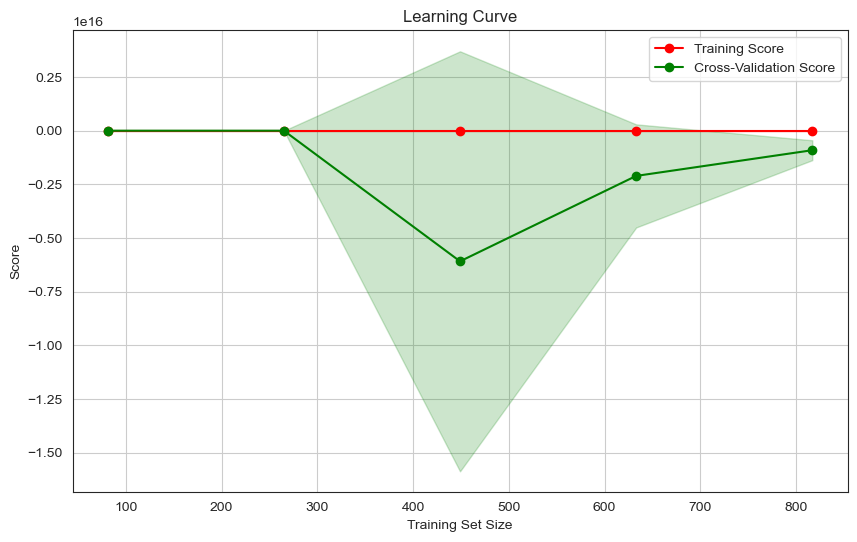

In [25]:
plot_learning_curve(pipe_linreg_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [26]:
#define ML models
linreg_ts = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 405256084366517.69 +/- 327445574014152.31


In [27]:
evaluation_metrics = {}

pipe_linreg_ts.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
predictions = pipe_linreg_ts.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts = pipe_linreg_ts.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts, mse_linreg_ts, rmse_linreg_ts, r2_linreg_ts, rmsle_linreg_ts, mape_linreg_ts = evaluate_model(predictions, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts"
evaluation_metrics['MAE'] = f'{mae_linreg_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: linreg_ts
MAE: 34327721122903.835938
MSE: 115050122527910134049910292480.000000
RMSE: 339190392741171.437500
R2_train: 0.884492
R2: -16487328268920176640.000000
RMSLE: 2.413460
MAPE: 23828635908.687668


In [28]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_ts, r2_test=r2_linreg_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

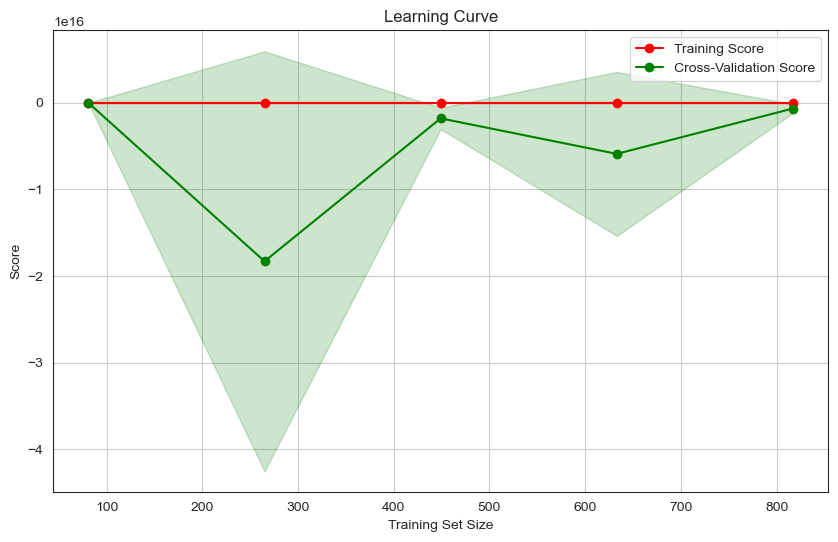

In [29]:
plot_learning_curve(pipe_linreg_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [30]:
#define ML models
linreg_ts_pca = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 36523.47 +/- 4676.63


In [31]:
evaluation_metrics = {}

pipe_linreg_ts_pca.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
predictions = pipe_linreg_ts_pca.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts_pca = pipe_linreg_ts_pca.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts_pca, mse_linreg_ts_pca, rmse_linreg_ts_pca, r2_linreg_ts_pca, rmsle_linreg_ts_pca, mape_linreg_ts_pca = evaluate_model(predictions, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts_pca"
evaluation_metrics['MAE'] = f'{mae_linreg_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: linreg_ts_pca
MAE: 23682.719562
MSE: 1333819869.872929
RMSE: 36521.498735
R2_train: 0.873422
R2: 0.808856
RMSLE: 0.205593
MAPE: 14.410020


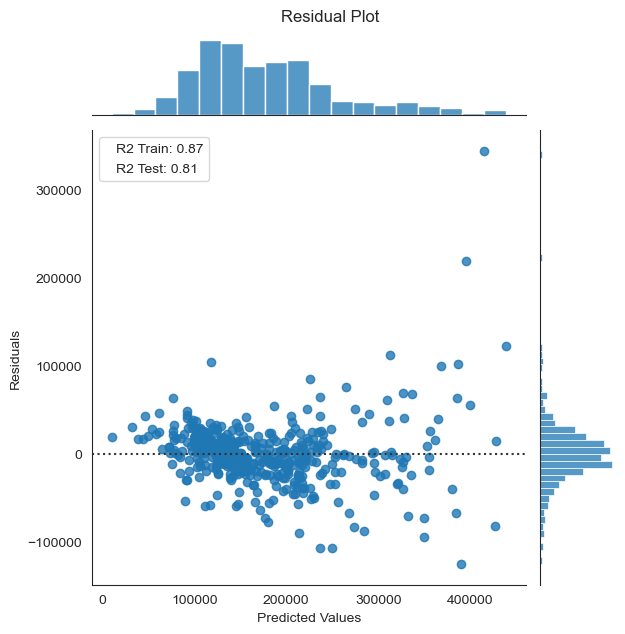

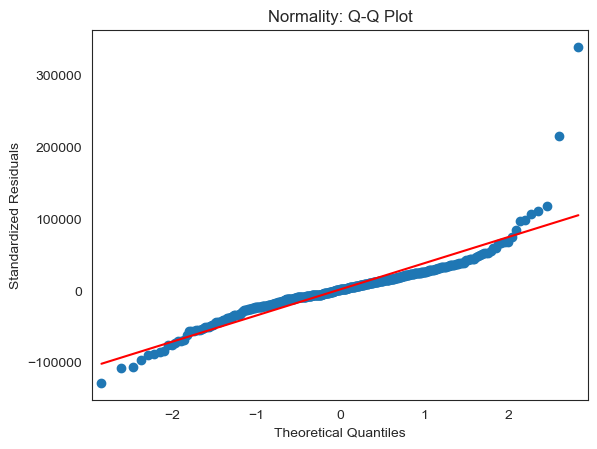

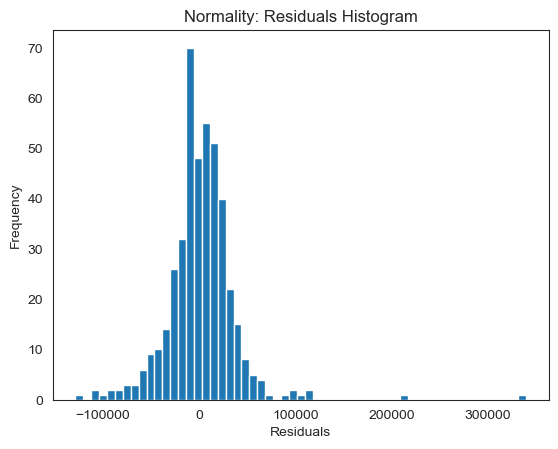

Shapiro-Wilk Test:
Test Statistic: 0.846540093421936
p-value: 3.141775107496462e-20
The residuals do not appear to be normally distributed (reject H0)


In [32]:
residual_plot(y_val, predictions, r2_train=r2_train_linreg_ts_pca, r2_test=r2_linreg_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

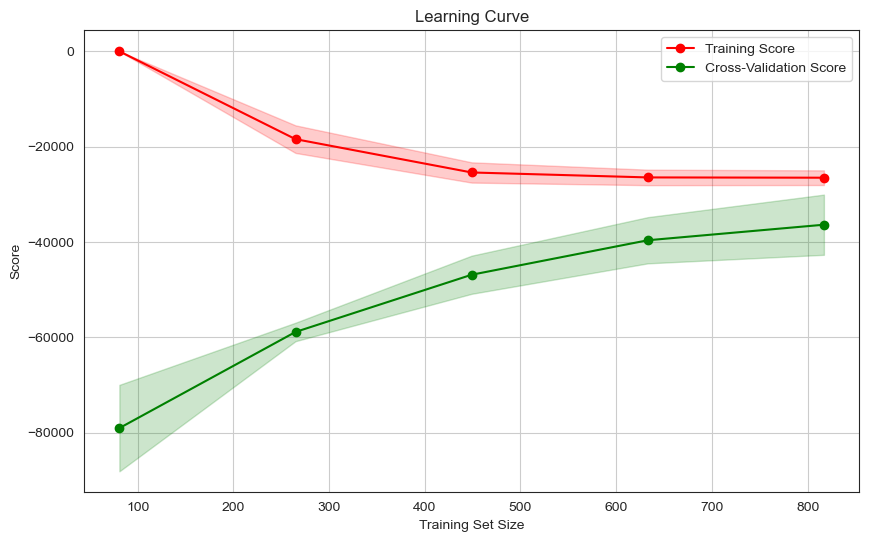

In [33]:
plot_learning_curve(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Lasso Regression
### With Transformer

In [34]:
%%time
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_tf = GridSearchCV(pipe_lasso_tf, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 406 ms
Wall time: 6.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [35]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_tf = round(grid_search_lasso_tf.cv_results_["std_test_score"][grid_search_lasso_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_tf.best_params_)
print("Best score: ", grid_search_lasso_tf.best_score_, f" ({std_lasso_tf})")

# valuate model on validation data
r2_train_lasso_tf = grid_search_lasso_tf.score(X_val, y_val)

best_model_lasso_tf = grid_search_lasso_tf.best_estimator_
y_pred_val_lasso_tf = best_model_lasso_tf.predict(X_val)

# Compute the evaluation metrics
mae_lasso_tf, mse_lasso_tf, rmse_lasso_tf, r2_lasso_tf, rmsle_lasso_tf, mape_lasso_tf = evaluate_model(y_pred_val_lasso_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_tf"
evaluation_metrics['best_params_'] = grid_search_lasso_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 100}
Best score:  0.7950475653297351  (0.1016)
model: lasso_tf
best_params_: {'lasso__alpha': 100}
MAE: 19938.190519
MSE: 1028609032.653526
RMSE: 32071.935281
R2_train: 0.852595
R2: 0.852595
RMSLE: 0.163757
MAPE: 11.976247


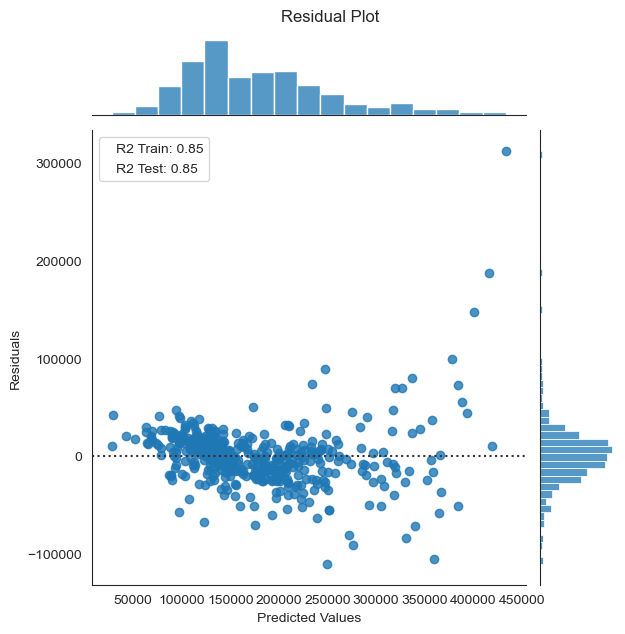

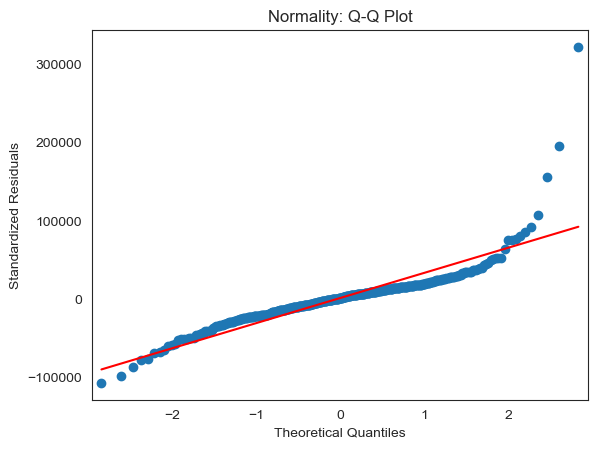

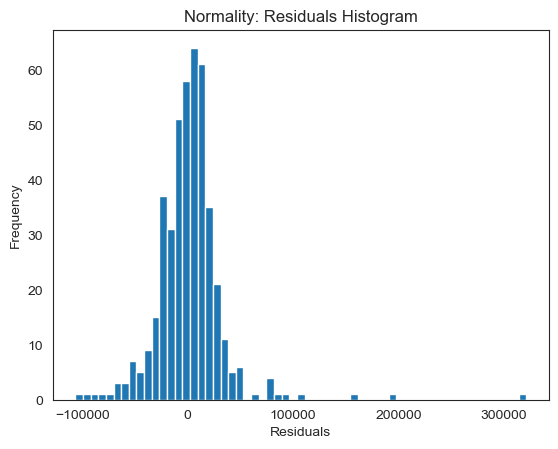

Shapiro-Wilk Test:
Test Statistic: 0.7969347834587097
p-value: 5.170117695538524e-23
The residuals do not appear to be normally distributed (reject H0)


In [36]:
residual_plot(y_val, y_pred_val_lasso_tf, r2_train=r2_train_lasso_tf, r2_test=r2_lasso_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+10, tolerance: 1.727e+10

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

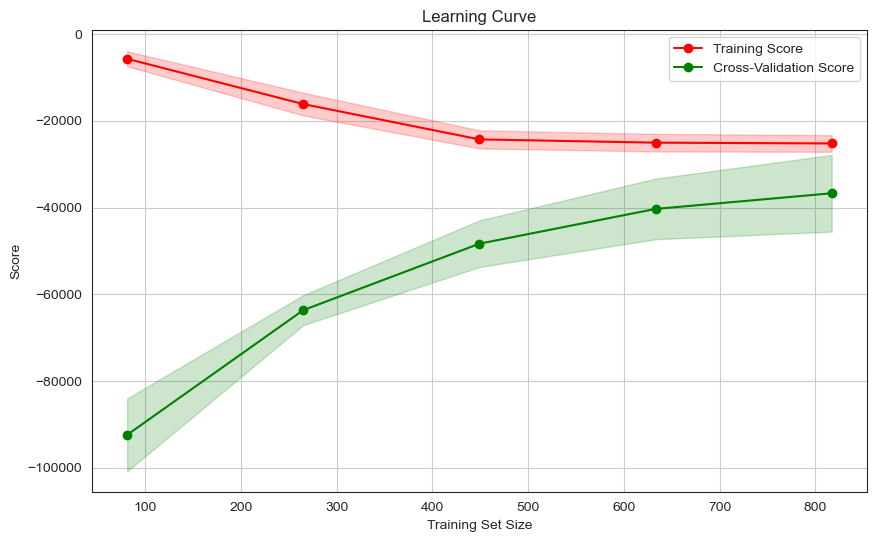

In [37]:
plot_learning_curve(pipe_lasso_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [38]:
%%time
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts = GridSearchCV(pipe_lasso_ts, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 234 ms
Wall time: 3.29 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [39]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts = round(grid_search_lasso_ts.cv_results_["std_test_score"][grid_search_lasso_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts.best_params_)
print("Best score: ", grid_search_lasso_ts.best_score_, f" ({std_lasso_ts})")

# valuate model on validation data
r2_train_lasso_ts = grid_search_lasso_ts.score(X_val, y_val)

best_model_lasso_ts = grid_search_lasso_ts.best_estimator_
y_pred_val_lasso_ts = best_model_lasso_ts.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts, mse_lasso_ts, rmse_lasso_ts, r2_lasso_ts, rmsle_lasso_ts, mape_lasso_ts = evaluate_model(y_pred_val_lasso_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts"
evaluation_metrics['best_params_'] = grid_search_lasso_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 100}
Best score:  0.7972632363478851  (0.0981)
model: lasso_ts
best_params_: {'lasso__alpha': 100}
MAE: 19875.305980
MSE: 1026378308.576663
RMSE: 32037.139519
R2_train: 0.852914
R2: 0.852914
RMSLE: 0.163413
MAPE: 11.936315


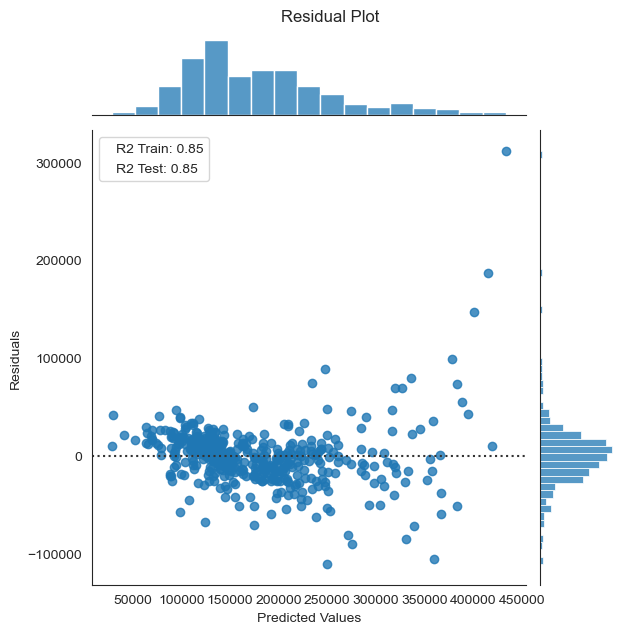

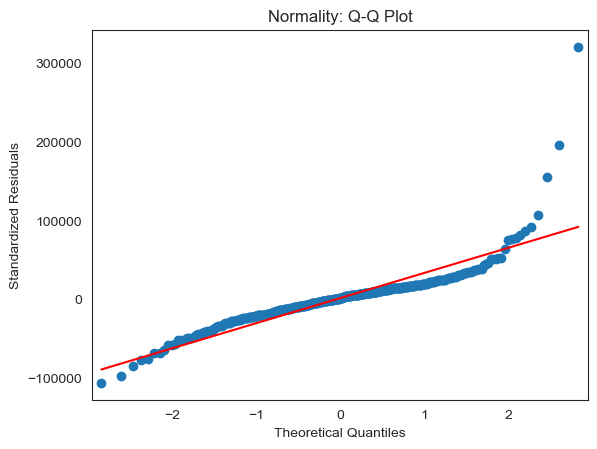

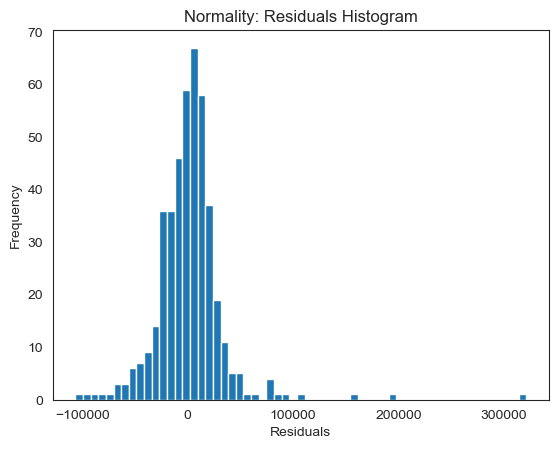

Shapiro-Wilk Test:
Test Statistic: 0.7953943014144897
p-value: 4.3223863097714026e-23
The residuals do not appear to be normally distributed (reject H0)


In [40]:
residual_plot(y_val, y_pred_val_lasso_ts, r2_train=r2_train_lasso_ts, r2_test=r2_lasso_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.644e+10, tolerance: 1.727e+10

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

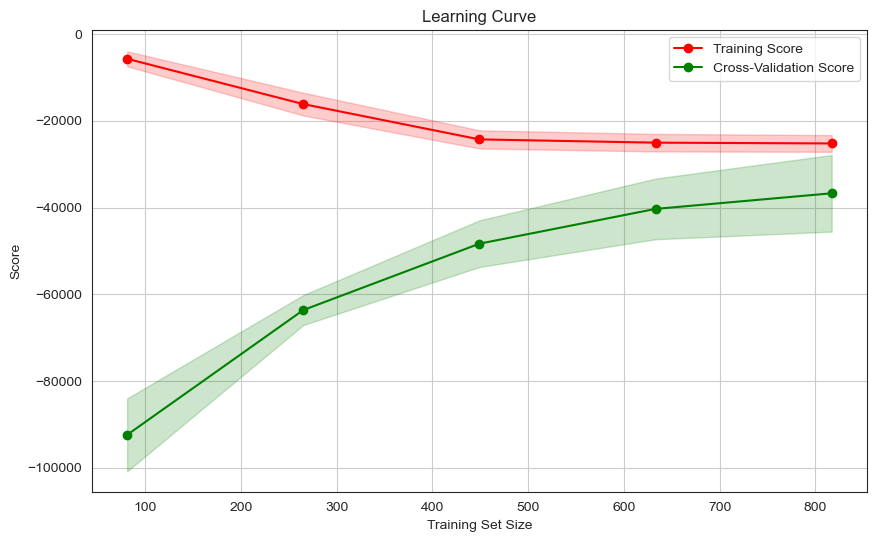

In [41]:
plot_learning_curve(pipe_lasso_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [42]:
%%time
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts_pca = GridSearchCV(pipe_lasso_ts_pca, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 422 ms
Wall time: 12.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [43]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts_pca = round(grid_search_lasso_ts_pca.cv_results_["std_test_score"][grid_search_lasso_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts_pca.best_params_)
print("Best score: ", grid_search_lasso_ts_pca.best_score_, f" ({std_lasso_ts_pca})")

# valuate model on validation data
r2_train_lasso_ts_pca = grid_search_lasso_ts_pca.score(X_val, y_val)

best_model_lasso_ts_pca = grid_search_lasso_ts_pca.best_estimator_
y_pred_val_lasso_ts_pca = best_model_lasso_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts_pca, mse_lasso_ts_pca, rmse_lasso_ts_pca, r2_lasso_ts_pca, rmsle_lasso_ts_pca, mape_lasso_ts_pca = evaluate_model(y_pred_val_lasso_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts_pca"
evaluation_metrics['best_params_'] = grid_search_lasso_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 100}
Best score:  0.8032077617087874  (0.0675)
model: lasso_ts_pca
best_params_: {'lasso__alpha': 100}
MAE: 21387.376530
MSE: 1173639272.748207
RMSE: 34258.419005
R2_train: 0.831811
R2: 0.831811
RMSLE: 0.180436
MAPE: 12.979224


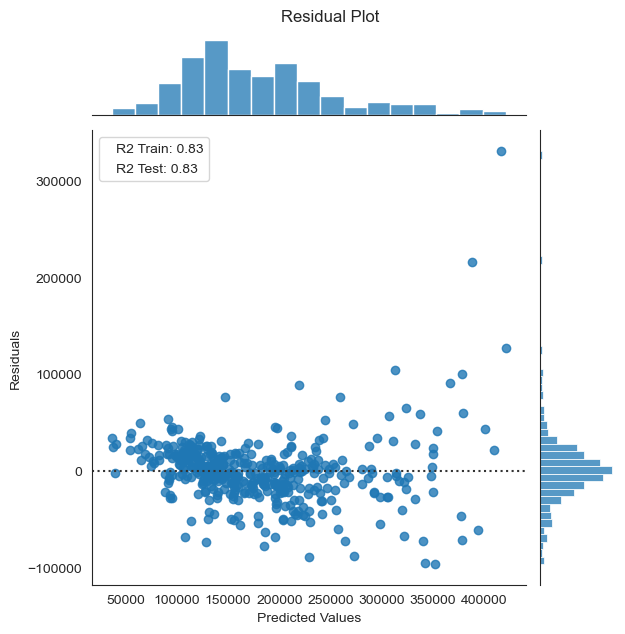

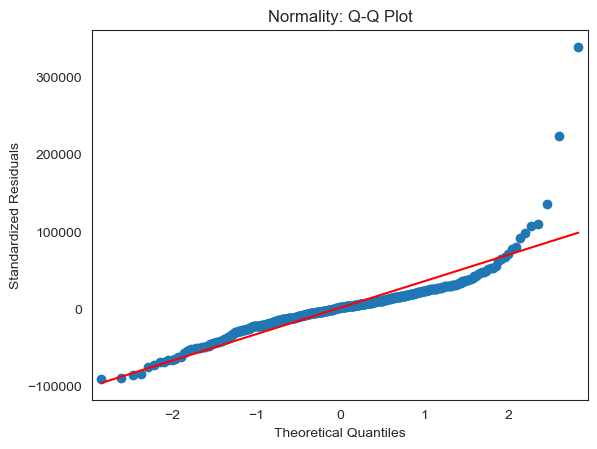

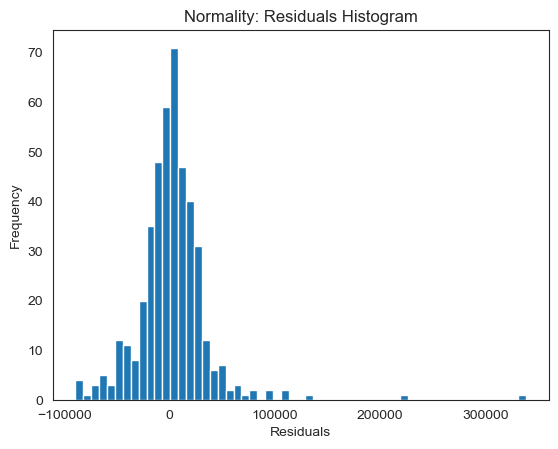

Shapiro-Wilk Test:
Test Statistic: 0.8079479932785034
p-value: 1.918823877464396e-22
The residuals do not appear to be normally distributed (reject H0)


In [44]:
residual_plot(y_val, y_pred_val_lasso_ts_pca, r2_train=r2_train_lasso_ts_pca, r2_test=r2_lasso_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 19970548923.043564, tolerance: 17266087137.913357

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to

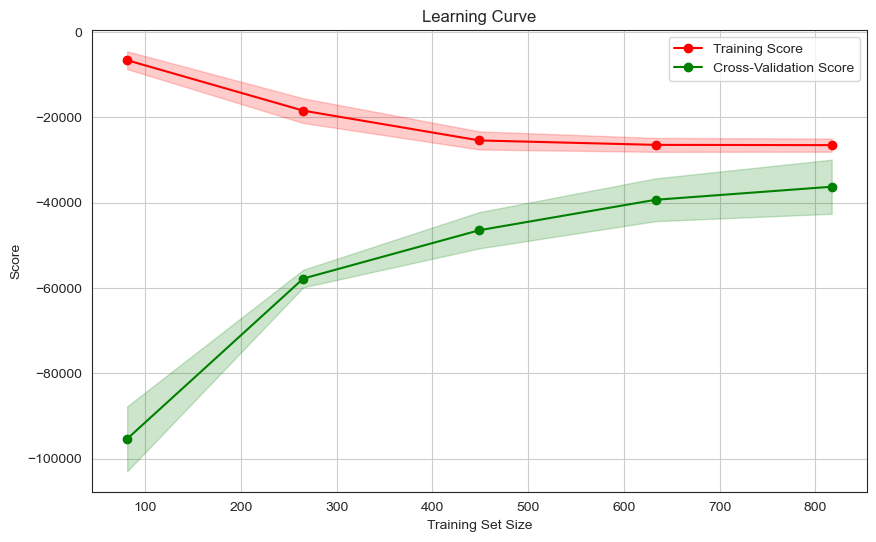

In [45]:
plot_learning_curve(pipe_lasso_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Ridge Regression
### With Transformer

In [46]:
%%time
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_tf = GridSearchCV(pipe_krr_tf, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 10.1 s
Wall time: 1min 34s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [47]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_tf = round(grid_search_krr_tf.cv_results_["std_test_score"][grid_search_krr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_tf.best_params_)
print("Best score: ", grid_search_krr_tf.best_score_, f" ({std_krr_tf})")

# valuate model on validation data
r2_train_krr_tf = grid_search_krr_tf.score(X_val, y_val)

best_model_krr_tf = grid_search_krr_tf.best_estimator_
y_pred_val_krr_tf = best_model_krr_tf.predict(X_val)

# Compute the evaluation metrics
mae_krr_tf, mse_krr_tf, rmse_krr_tf, r2_krr_tf, rmsle_krr_tf, mape_krr_tf = evaluate_model(y_pred_val_krr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_tf"
evaluation_metrics['best_params_'] = grid_search_krr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 100, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
Best score:  0.7990500434907303  (0.0907)
model: krr_tf
best_params_: {'krr__alpha': 100, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
MAE: 19898.589528
MSE: 1070336836.624036
RMSE: 32716.002760
R2_train: 0.846615
R2: 0.846615
RMSLE: 0.168343
MAPE: 11.697046


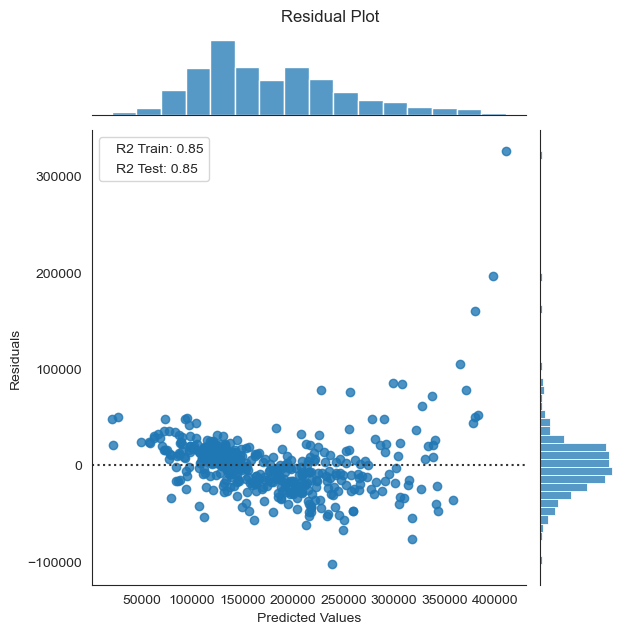

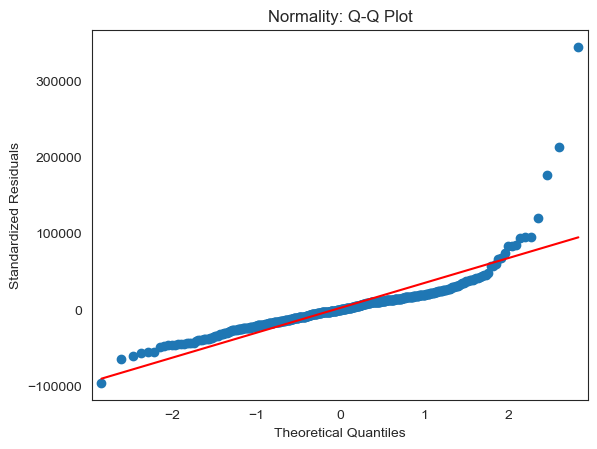

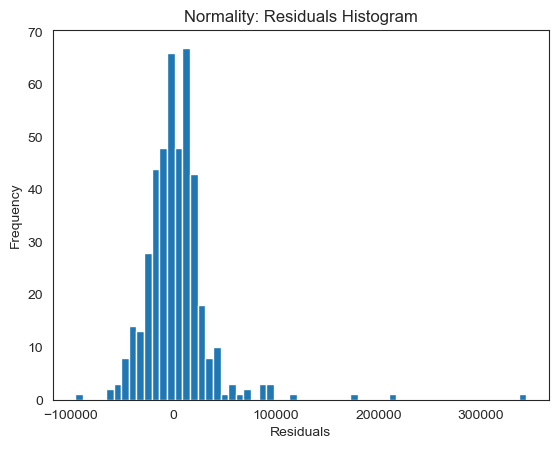

Shapiro-Wilk Test:
Test Statistic: 0.7567899227142334
p-value: 6.586328380625392e-25
The residuals do not appear to be normally distributed (reject H0)


In [48]:
residual_plot(y_val, y_pred_val_krr_tf, r2_train=r2_train_krr_tf, r2_test=r2_krr_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

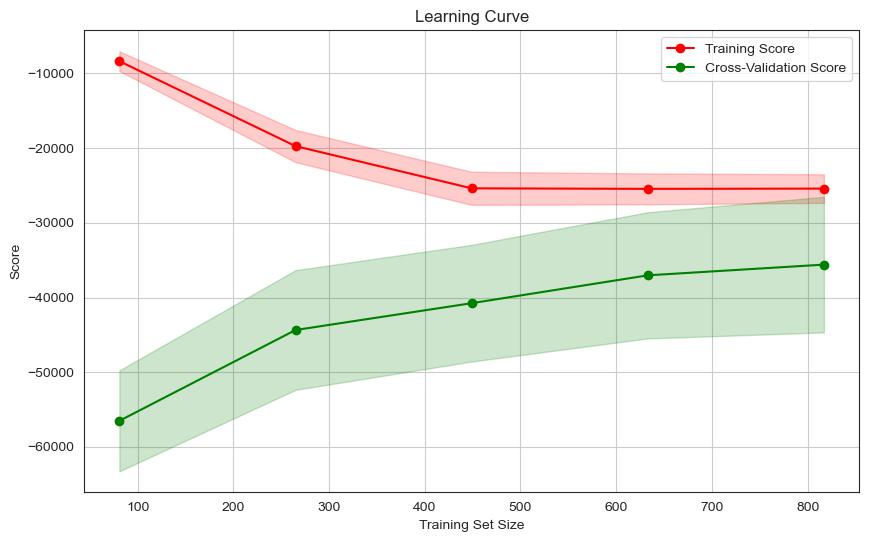

In [49]:
plot_learning_curve(pipe_krr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [50]:
%%time
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts = GridSearchCV(pipe_krr_ts, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 12.2 s
Wall time: 1min 35s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [51]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts = round(grid_search_krr_ts.cv_results_["std_test_score"][grid_search_krr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts.best_params_)
print("Best score: ", grid_search_krr_ts.best_score_, f" ({std_krr_ts})")

# valuate model on validation data
r2_train_krr_ts = grid_search_krr_ts.score(X_val, y_val)

best_model_krr_ts = grid_search_krr_ts.best_estimator_
y_pred_val_krr_ts = best_model_krr_ts.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts, mse_krr_ts, rmse_krr_ts, r2_krr_ts, rmsle_krr_ts, mape_krr_ts = evaluate_model(y_pred_val_krr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts"
evaluation_metrics['best_params_'] = grid_search_krr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 100, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
Best score:  0.8003894951125506  (0.0851)
model: krr_ts
best_params_: {'krr__alpha': 100, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
MAE: 19772.077768
MSE: 1085313846.900097
RMSE: 32944.101853
R2_train: 0.844468
R2: 0.844468
RMSLE: 0.168198
MAPE: 11.598514


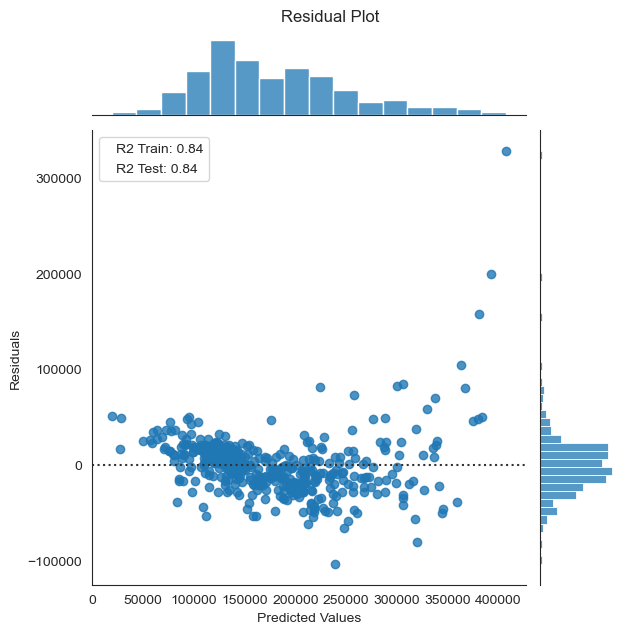

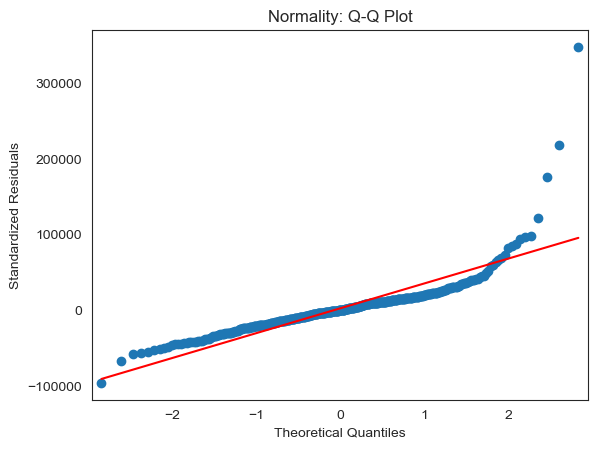

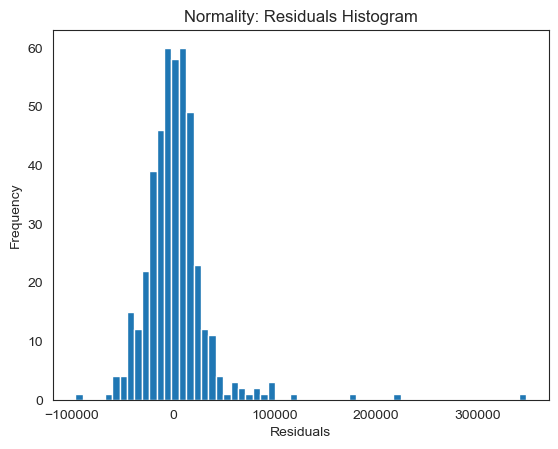

Shapiro-Wilk Test:
Test Statistic: 0.7514937520027161
p-value: 3.8638601887761135e-25
The residuals do not appear to be normally distributed (reject H0)


In [52]:
residual_plot(y_val, y_pred_val_krr_ts, r2_train=r2_train_krr_ts, r2_test=r2_krr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

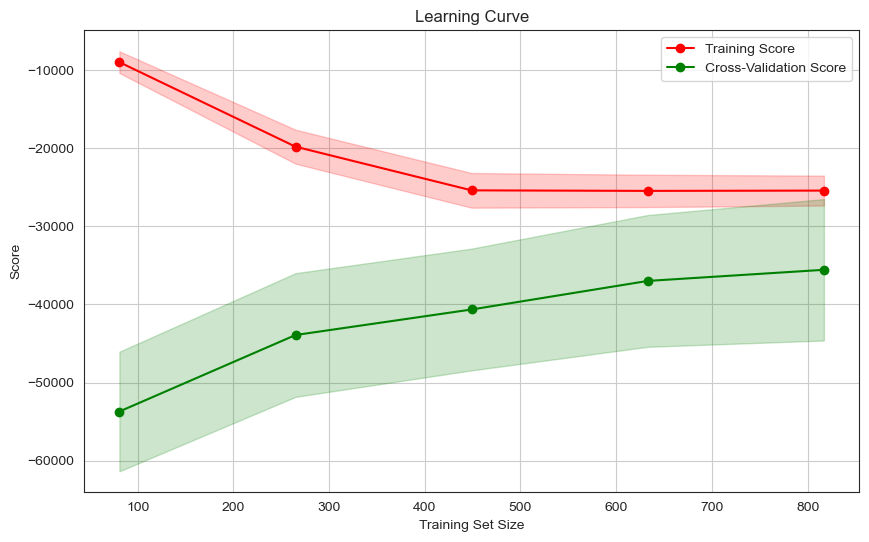

In [53]:
plot_learning_curve(pipe_krr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [54]:
%%time
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts_pca = GridSearchCV(pipe_krr_ts_pca, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 12.6 s
Wall time: 2min 22s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [55]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts_pca = round(grid_search_krr_ts_pca.cv_results_["std_test_score"][grid_search_krr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts_pca.best_params_)
print("Best score: ", grid_search_krr_ts_pca.best_score_, f" ({std_krr_ts_pca})")

# valuate model on validation data
r2_train_krr_ts_pca = grid_search_krr_ts_pca.score(X_val, y_val)

best_model_krr_ts_pca = grid_search_krr_ts_pca.best_estimator_
y_pred_val_krr_ts_pca = best_model_krr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts_pca, mse_krr_ts_pca, rmse_krr_ts_pca, r2_krr_ts_pca, rmsle_krr_ts_pca, mape_krr_ts_pca = evaluate_model(y_pred_val_krr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_krr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 10, 'krr__degree': 3, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
Best score:  0.8040491727533704  (0.0761)
model: krr_ts_pca
best_params_: {'krr__alpha': 10, 'krr__degree': 3, 'krr__gamma': 0.1, 'krr__kernel': 'linear'}
MAE: 21216.179869
MSE: 1141598055.940451
RMSE: 33787.542911
R2_train: 0.836403
R2: 0.836403
RMSLE: 0.181028
MAPE: 12.812202


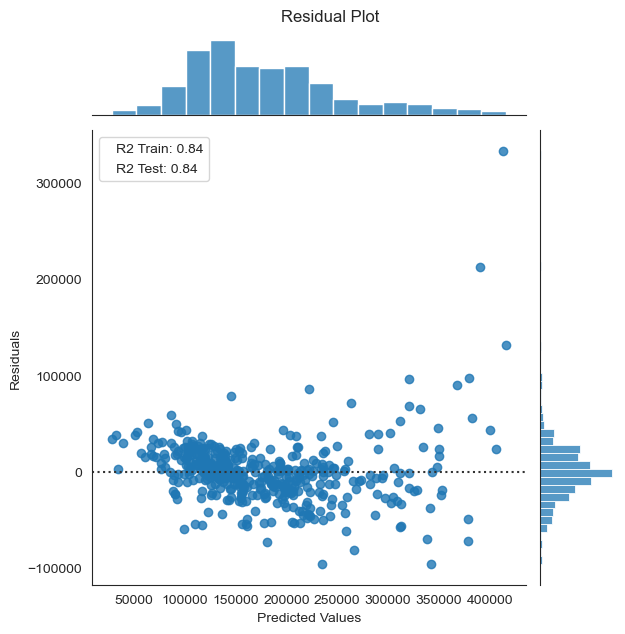

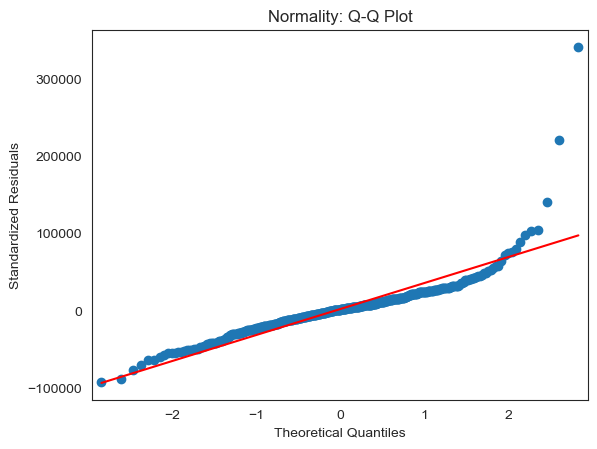

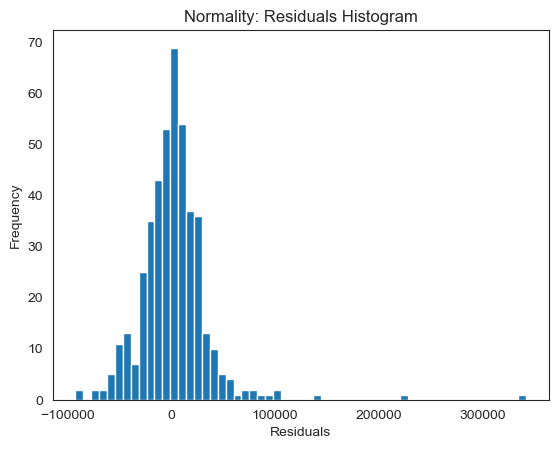

Shapiro-Wilk Test:
Test Statistic: 0.8038687705993652
p-value: 1.1728983362862843e-22
The residuals do not appear to be normally distributed (reject H0)


In [56]:
residual_plot(y_val, y_pred_val_krr_ts_pca, r2_train=r2_train_krr_ts_pca, r2_test=r2_krr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

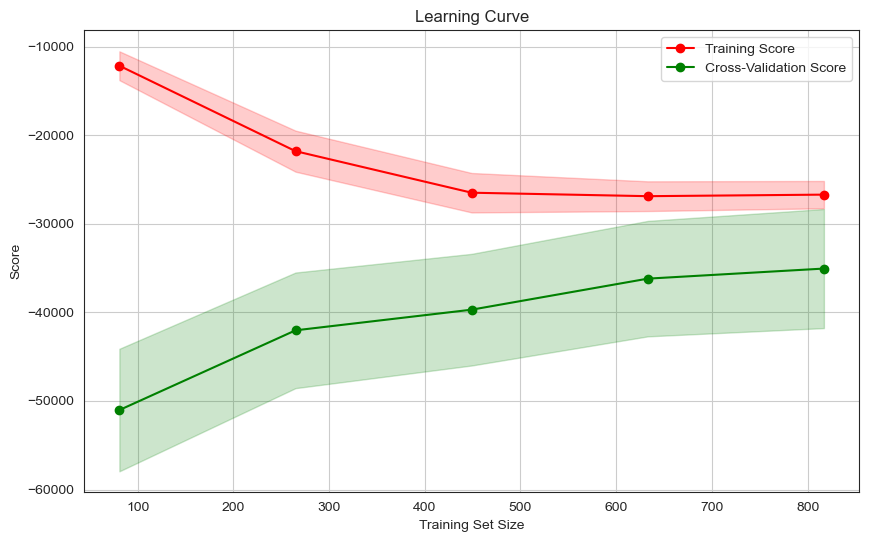

In [57]:
plot_learning_curve(pipe_krr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Elastic Net
### With Transformer

In [58]:
%%time
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_tf = GridSearchCV(pipe_enet_tf, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 1.48 s
Wall time: 11.7 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [59]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_tf = round(grid_search_enet_tf.cv_results_["std_test_score"][grid_search_enet_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_tf.best_params_)
print("Best score: ", grid_search_enet_tf.best_score_, f" ({std_enet_tf})")

# valuate model on validation data
r2_train_enet_tf = grid_search_enet_tf.score(X_val, y_val)

best_model_enet_tf = grid_search_enet_tf.best_estimator_
y_pred_val_enet_tf = best_model_enet_tf.predict(X_val)

# Compute the evaluation metrics
mae_enet_tf, mse_enet_tf, rmse_enet_tf, r2_enet_tf, rmsle_enet_tf, mape_enet_tf = evaluate_model(y_pred_val_enet_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_tf"
evaluation_metrics['best_params_'] = grid_search_enet_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 10, 'enet__l1_ratio': 0.99}
Best score:  0.797942774996041  (0.0957)
model: enet_tf
best_params_: {'enet__alpha': 10, 'enet__l1_ratio': 0.99}
MAE: 19929.621927
MSE: 1078914775.907493
RMSE: 32846.838142
R2_train: 0.845385
R2: 0.845385
RMSLE: 0.166889
MAPE: 11.723187


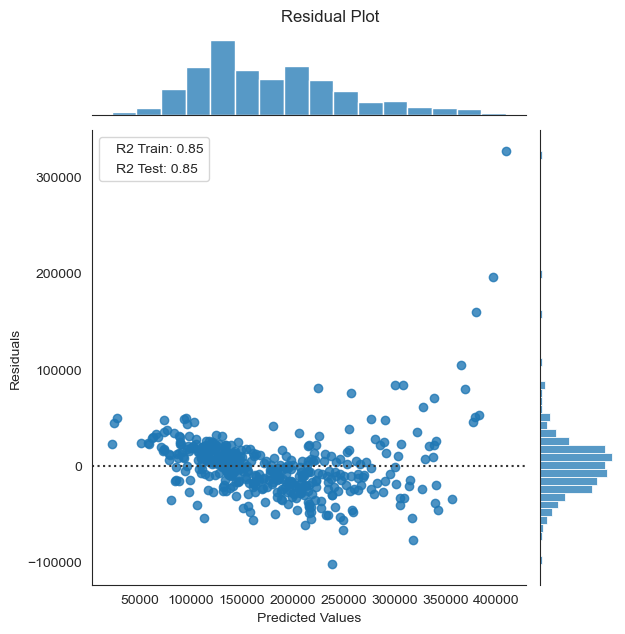

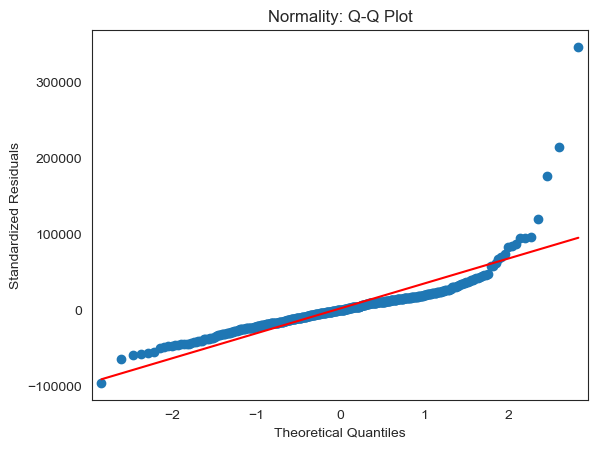

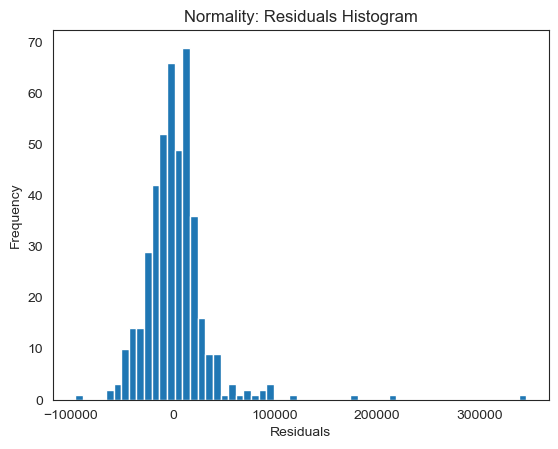

Shapiro-Wilk Test:
Test Statistic: 0.7561387419700623
p-value: 6.165294087024373e-25
The residuals do not appear to be normally distributed (reject H0)


In [60]:
residual_plot(y_val, y_pred_val_enet_tf, r2_train=r2_train_enet_tf, r2_test=r2_enet_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

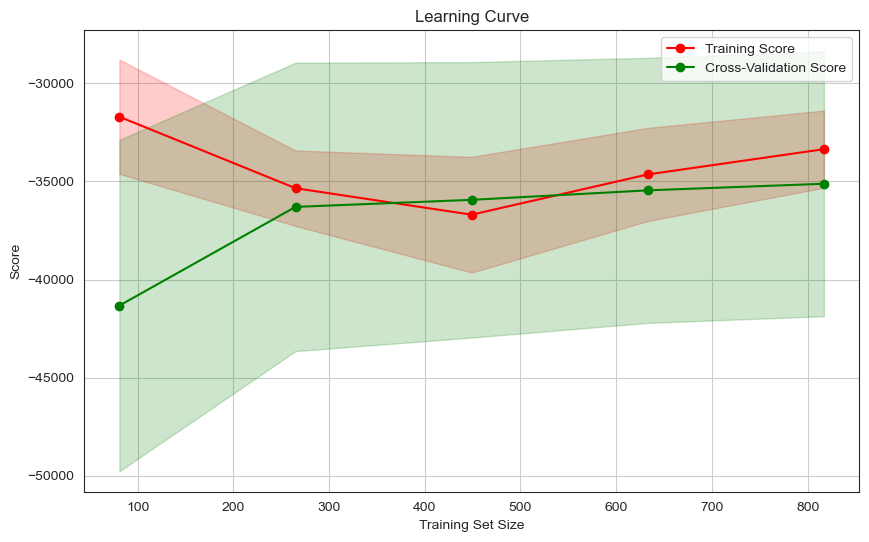

In [61]:
plot_learning_curve(pipe_enet_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [62]:
%%time
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts = GridSearchCV(pipe_enet_ts, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 1.69 s
Wall time: 11.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [63]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts = round(grid_search_enet_ts.cv_results_["std_test_score"][grid_search_enet_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts.best_params_)
print("Best score: ", grid_search_enet_ts.best_score_, f" ({std_enet_ts})")

# valuate model on validation data
r2_train_enet_ts = grid_search_enet_ts.score(X_val, y_val)

best_model_enet_ts = grid_search_enet_ts.best_estimator_
y_pred_val_enet_ts = best_model_enet_ts.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts, mse_enet_ts, rmse_enet_ts, r2_enet_ts, rmsle_enet_ts, mape_enet_ts = evaluate_model(y_pred_val_enet_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts"
evaluation_metrics['best_params_'] = grid_search_enet_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.1, 'enet__l1_ratio': 0.1}
Best score:  0.8001190606496374  (0.0913)
model: enet_ts
best_params_: {'enet__alpha': 0.1, 'enet__l1_ratio': 0.1}
MAE: 19759.024323
MSE: 1081599722.661694
RMSE: 32887.683449
R2_train: 0.845001
R2: 0.845001
RMSLE: 0.166492
MAPE: 11.608837


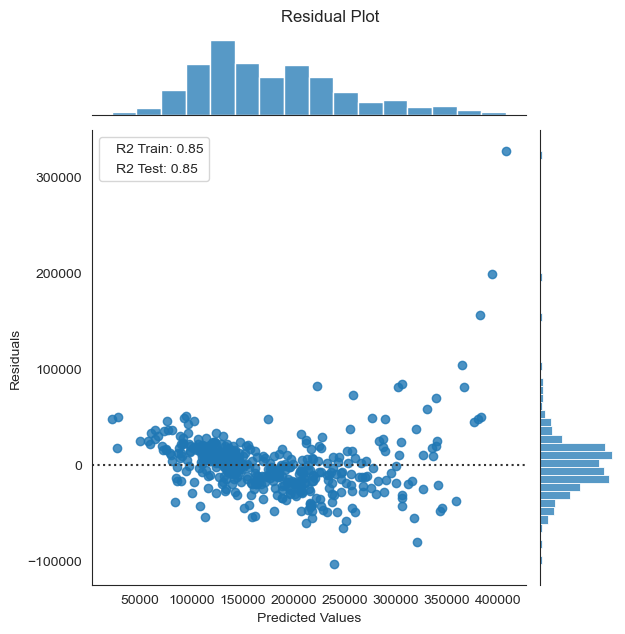

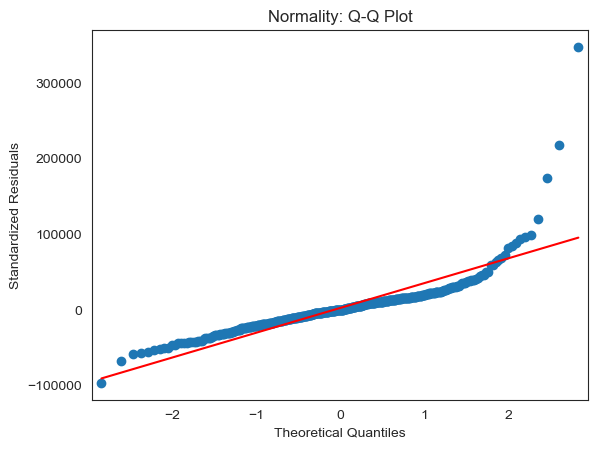

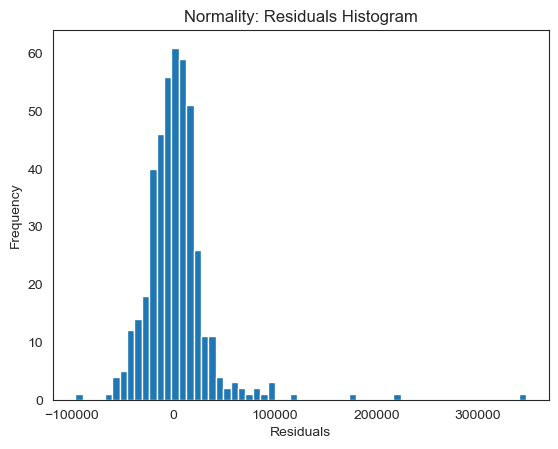

Shapiro-Wilk Test:
Test Statistic: 0.7529411315917969
p-value: 4.466188276943729e-25
The residuals do not appear to be normally distributed (reject H0)


In [64]:
residual_plot(y_val, y_pred_val_enet_ts, r2_train=r2_train_enet_ts, r2_test=r2_enet_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

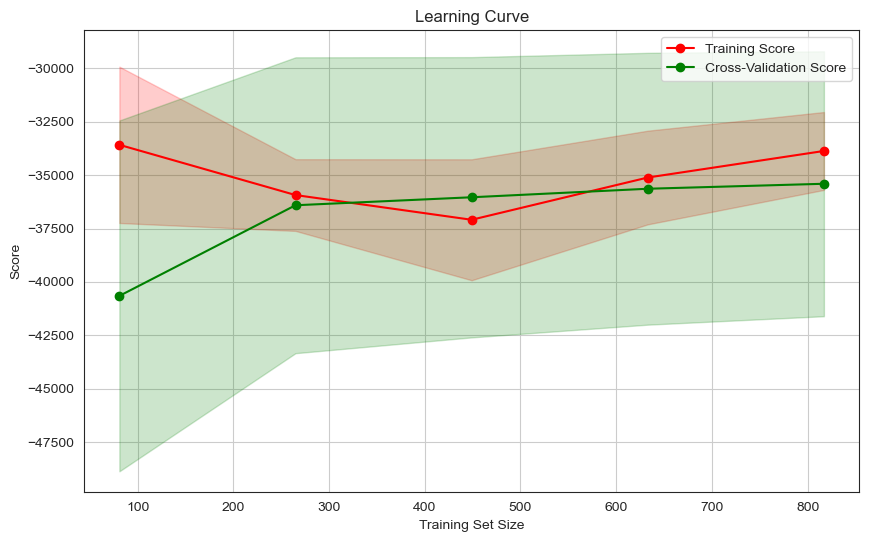

In [65]:
plot_learning_curve(pipe_enet_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [66]:
%%time
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts_pca = GridSearchCV(pipe_enet_ts_pca, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 1.91 s
Wall time: 28.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [67]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts_pca = round(grid_search_enet_ts_pca.cv_results_["std_test_score"][grid_search_enet_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts_pca.best_params_)
print("Best score: ", grid_search_enet_ts_pca.best_score_, f" ({std_enet_ts_pca})")

# valuate model on validation data
r2_train_enet_ts_pca = grid_search_enet_ts_pca.score(X_val, y_val)

best_model_enet_ts_pca = grid_search_enet_ts_pca.best_estimator_
y_pred_val_enet_ts_pca = best_model_enet_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts_pca, mse_enet_ts_pca, rmse_enet_ts_pca, r2_enet_ts_pca, rmsle_enet_ts_pca, mape_enet_ts_pca = evaluate_model(y_pred_val_enet_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts_pca"
evaluation_metrics['best_params_'] = grid_search_enet_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 1, 'enet__l1_ratio': 0.99}
Best score:  0.8031272176878625  (0.0773)
model: enet_ts_pca
best_params_: {'enet__alpha': 1, 'enet__l1_ratio': 0.99}
MAE: 21213.536899
MSE: 1144565326.268961
RMSE: 33831.425129
R2_train: 0.835977
R2: 0.835977
RMSLE: 0.180772
MAPE: 12.830677


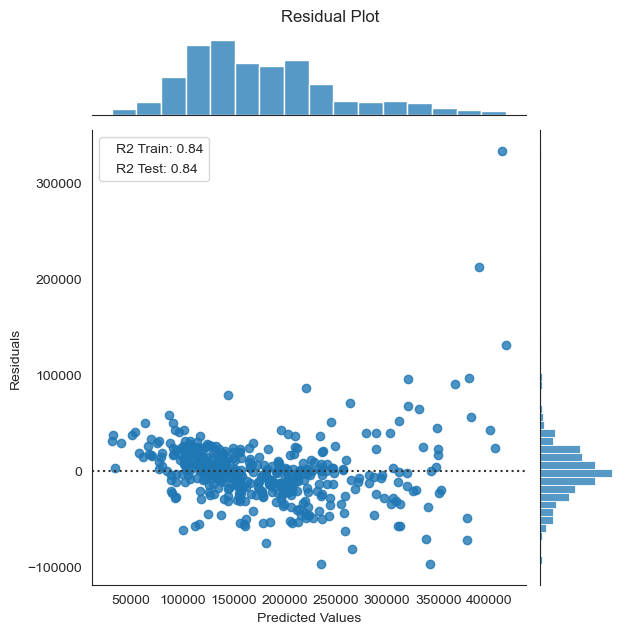

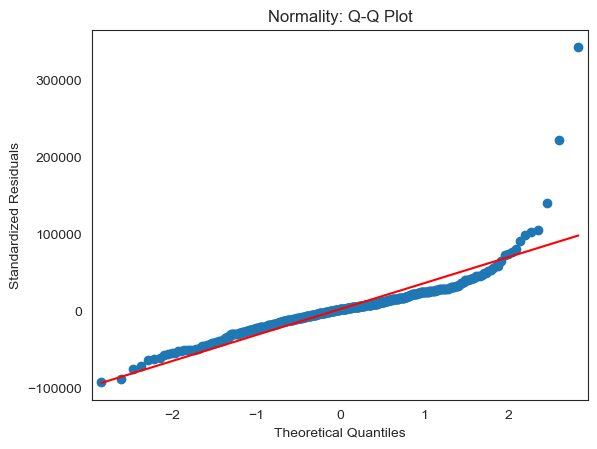

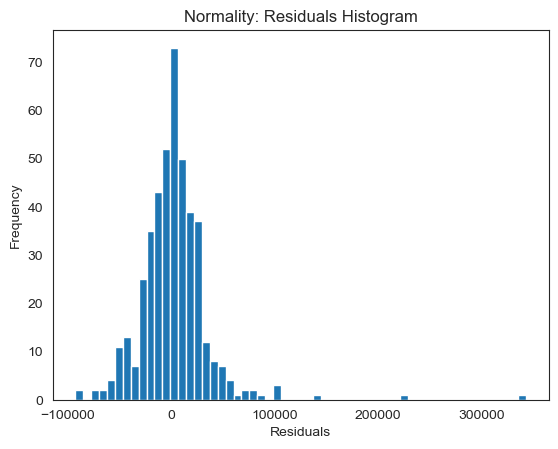

Shapiro-Wilk Test:
Test Statistic: 0.8028987646102905
p-value: 1.0445359626395524e-22
The residuals do not appear to be normally distributed (reject H0)


In [68]:
residual_plot(y_val, y_pred_val_enet_ts_pca, r2_train=r2_train_enet_ts_pca, r2_test=r2_enet_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

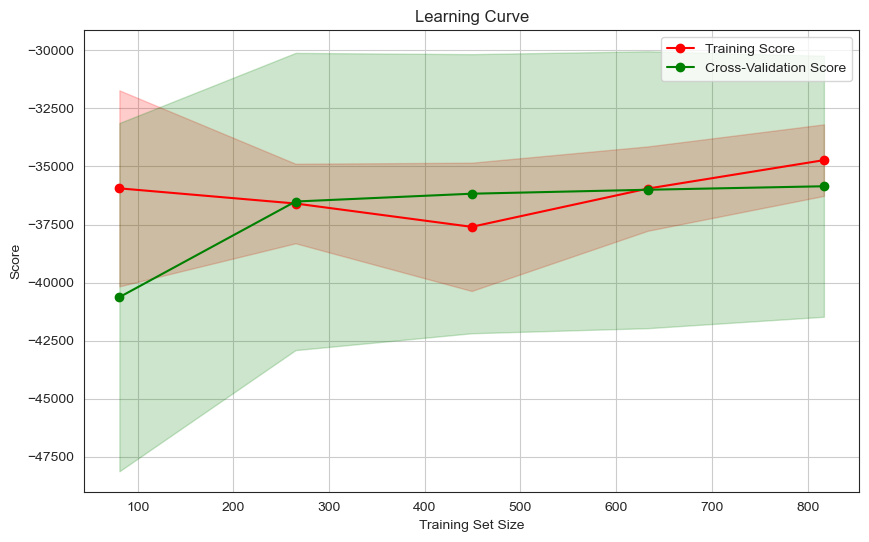

In [69]:
plot_learning_curve(pipe_enet_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Gradient Boosting Regressor
### With Transformer

In [70]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_tf = RandomizedSearchCV(estimator=pipe_gb_tf, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 17 s
Wall time: 12min 42s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [71]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_tf = round(random_search_gb_tf.cv_results_["std_test_score"][random_search_gb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_tf.best_params_)
print("Best score: ", random_search_gb_tf.best_score_, f" ({std_gb_tf})")

# valuate model on validation data
r2_train_gb_tf = random_search_gb_tf.score(X_val, y_val)

best_model_gb_tf = random_search_gb_tf.best_estimator_
y_pred_val_gb_tf = best_model_gb_tf.predict(X_val)

# Compute the evaluation metrics
mae_gb_tf, mse_gb_tf, rmse_gb_tf, r2_gb_tf, rmsle_gb_tf, mape_gb_tf = evaluate_model(y_pred_val_gb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_tf"
evaluation_metrics['best_params_'] = random_search_gb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.5, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 4, 'gb__max_depth': 7, 'gb__loss': 'absolute_error', 'gb__learning_rate': 0.05}
Best score:  0.8488911305300478  (0.0525)
model: gb_tf
best_params_: {'gb__subsample': 0.5, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 4, 'gb__max_depth': 7, 'gb__loss': 'absolute_error', 'gb__learning_rate': 0.05}
MAE: 15309.657043
MSE: 667338141.626036
RMSE: 25832.888759
R2_train: 0.904367
R2: 0.904367
RMSLE: 0.130287
MAPE: 8.985953


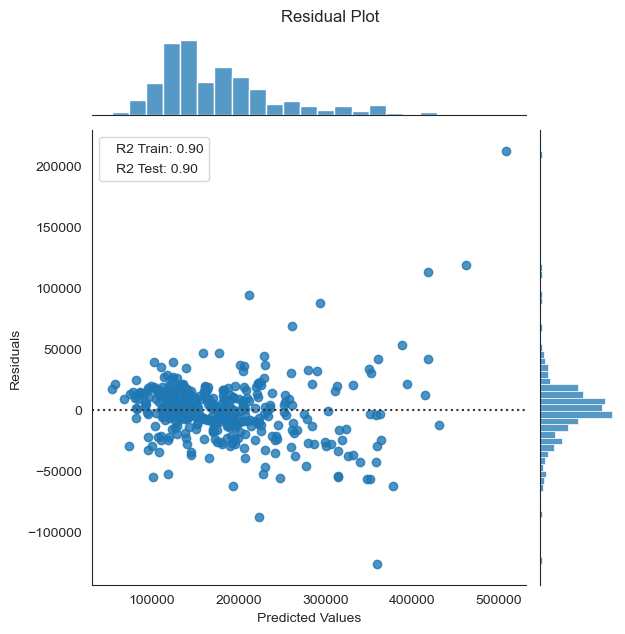

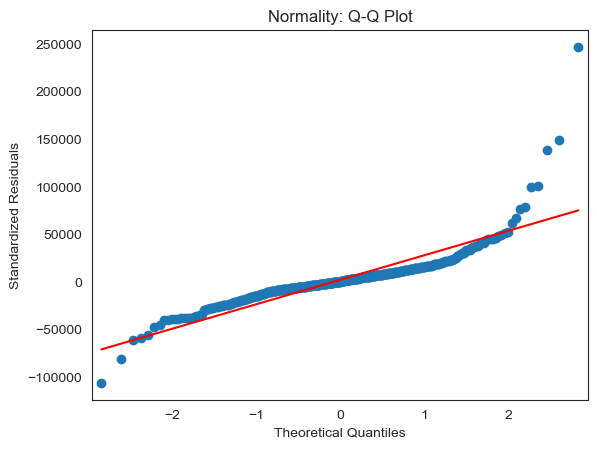

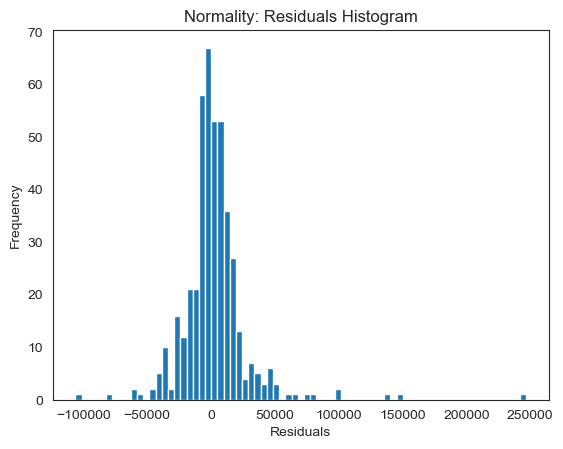

Shapiro-Wilk Test:
Test Statistic: 0.784875750541687
p-value: 1.3069220333282073e-23
The residuals do not appear to be normally distributed (reject H0)


In [72]:
residual_plot(y_val, y_pred_val_gb_tf, r2_train=r2_train_gb_tf, r2_test=r2_gb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

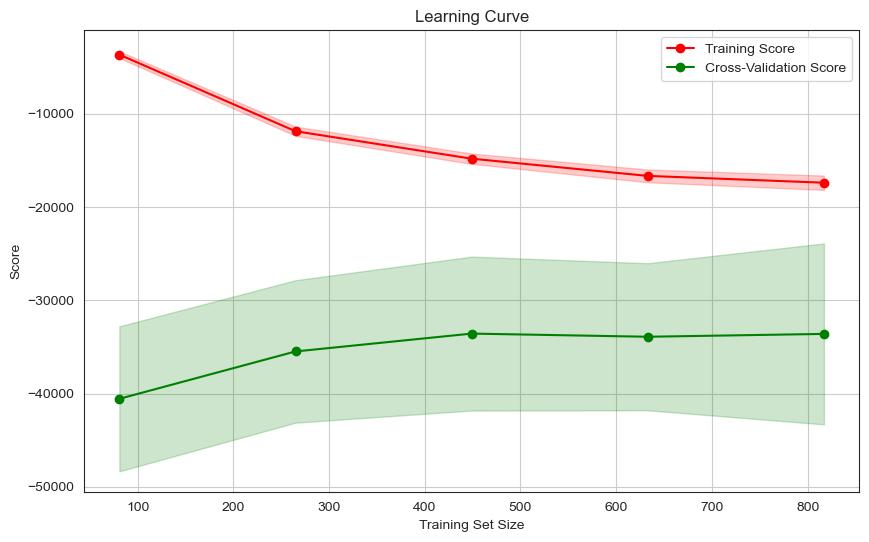

In [73]:
plot_learning_curve(pipe_gb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [74]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts = RandomizedSearchCV(estimator=pipe_gb_ts, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 14.2 s
Wall time: 12min 54s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [75]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts = round(random_search_gb_ts.cv_results_["std_test_score"][random_search_gb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts.best_params_)
print("Best score: ", random_search_gb_ts.best_score_, f" ({std_gb_ts})")

# valuate model on validation data
r2_train_gb_ts = random_search_gb_ts.score(X_val, y_val)

best_model_gb_ts = random_search_gb_ts.best_estimator_
y_pred_val_gb_ts = best_model_gb_ts.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts, mse_gb_ts, rmse_gb_ts, r2_gb_ts, rmsle_gb_ts, mape_gb_ts = evaluate_model(y_pred_val_gb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts"
evaluation_metrics['best_params_'] = random_search_gb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.5, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.05}
Best score:  0.8509976423425833  (0.0793)
model: gb_ts
best_params_: {'gb__subsample': 0.5, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.05}
MAE: 15991.512331
MSE: 647369656.495436
RMSE: 25443.459995
R2_train: 0.907228
R2: 0.907228
RMSLE: 0.135293
MAPE: 9.489630


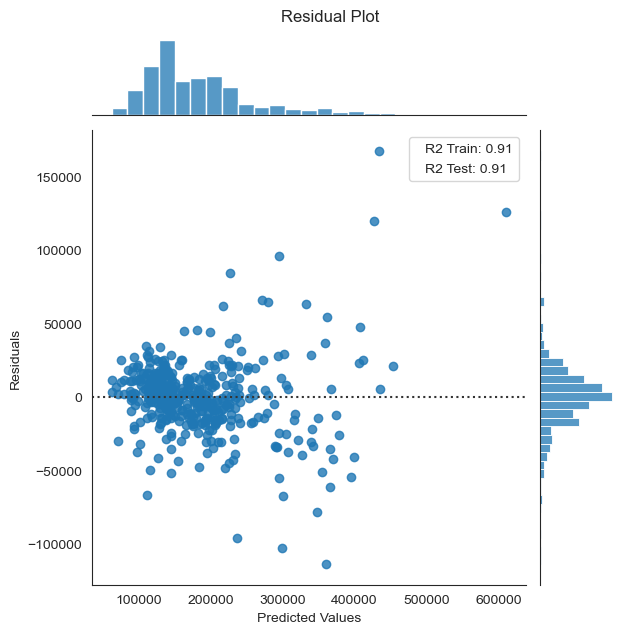

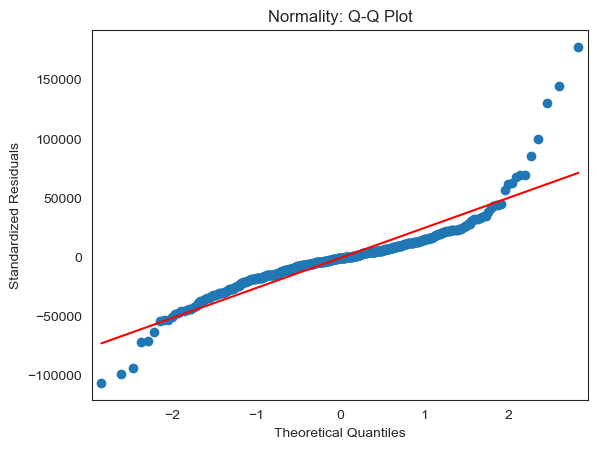

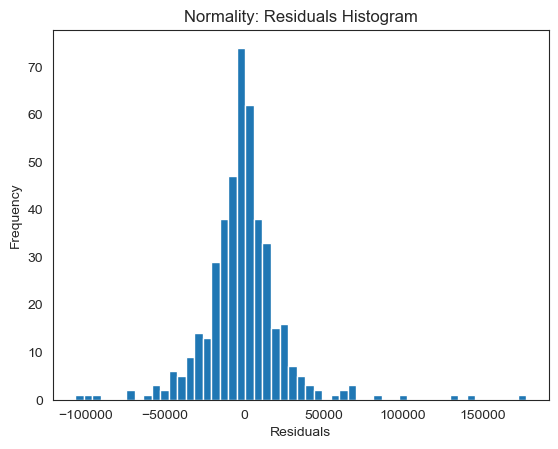

Shapiro-Wilk Test:
Test Statistic: 0.8543412685394287
p-value: 9.872740530353356e-20
The residuals do not appear to be normally distributed (reject H0)


In [76]:
residual_plot(y_val, y_pred_val_gb_ts, r2_train=r2_train_gb_ts, r2_test=r2_gb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

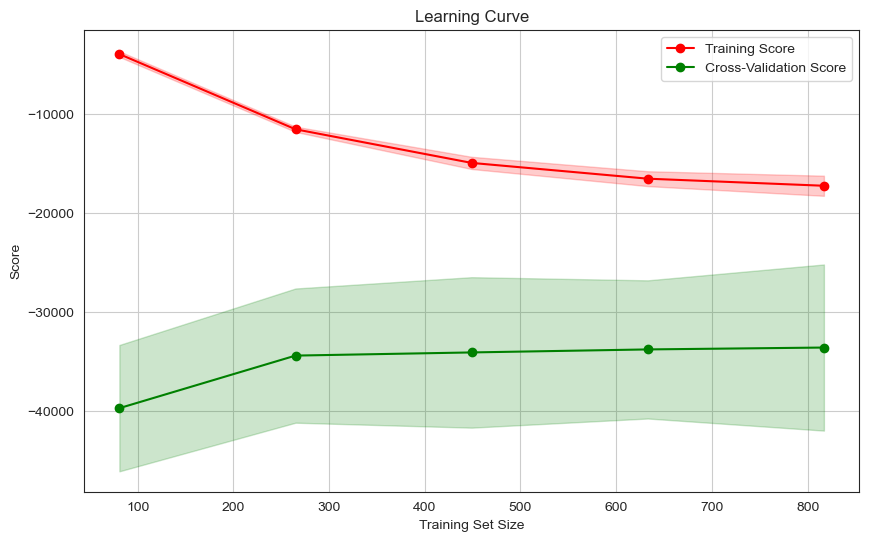

In [77]:
plot_learning_curve(pipe_gb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [78]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts_pca = RandomizedSearchCV(estimator=pipe_gb_ts_pca, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 19.4 s
Wall time: 13min 50s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [79]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts_pca = round(random_search_gb_ts_pca.cv_results_["std_test_score"][random_search_gb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts_pca.best_params_)
print("Best score: ", random_search_gb_ts_pca.best_score_, f" ({std_gb_ts_pca})")

# valuate model on validation data
r2_train_gb_ts_pca = random_search_gb_ts_pca.score(X_val, y_val)

best_model_gb_ts_pca = random_search_gb_ts_pca.best_estimator_
y_pred_val_gb_ts_pca = best_model_gb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts_pca, mse_gb_ts_pca, rmse_gb_ts_pca, r2_gb_ts_pca, rmsle_gb_ts_pca, mape_gb_ts_pca = evaluate_model(y_pred_val_gb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts_pca"
evaluation_metrics['best_params_'] = random_search_gb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 2, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.1}
Best score:  0.8442519351342653  (0.0539)
model: gb_ts_pca
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 2, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.1}
MAE: 18625.195794
MSE: 915060145.152951
RMSE: 30249.961077
R2_train: 0.868867
R2: 0.868867
RMSLE: 0.151587
MAPE: 10.932361


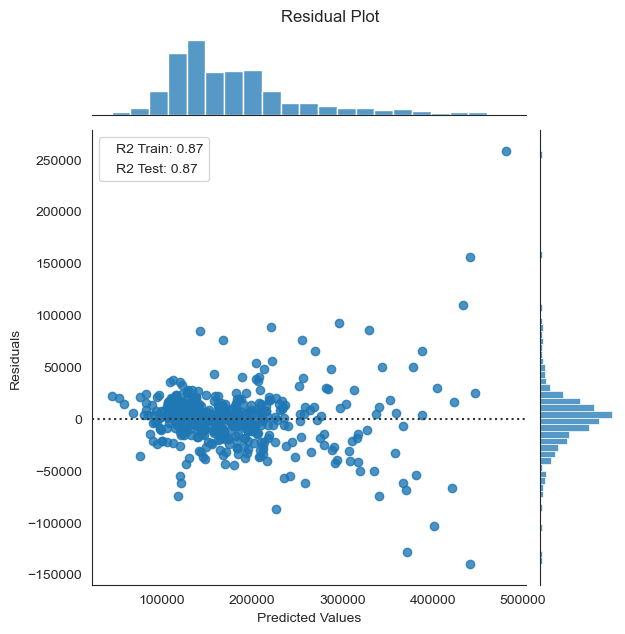

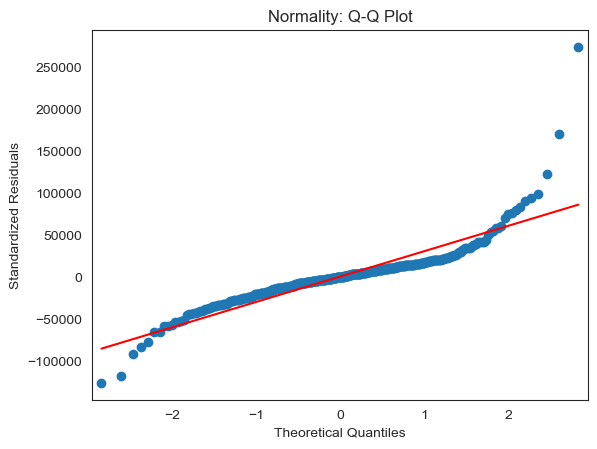

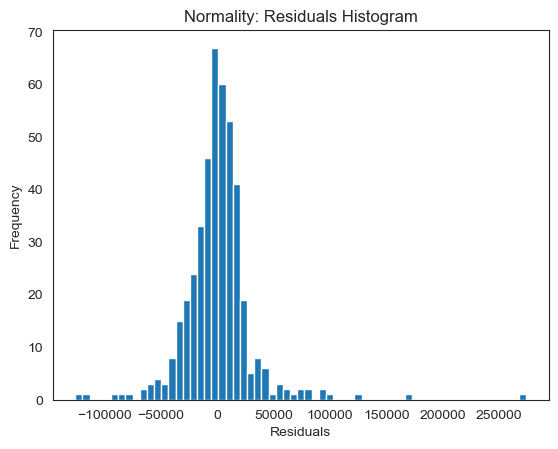

Shapiro-Wilk Test:
Test Statistic: 0.8219431638717651
p-value: 1.1057038964424786e-21
The residuals do not appear to be normally distributed (reject H0)


In [80]:
residual_plot(y_val, y_pred_val_gb_ts_pca, r2_train=r2_train_gb_ts_pca, r2_test=r2_gb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

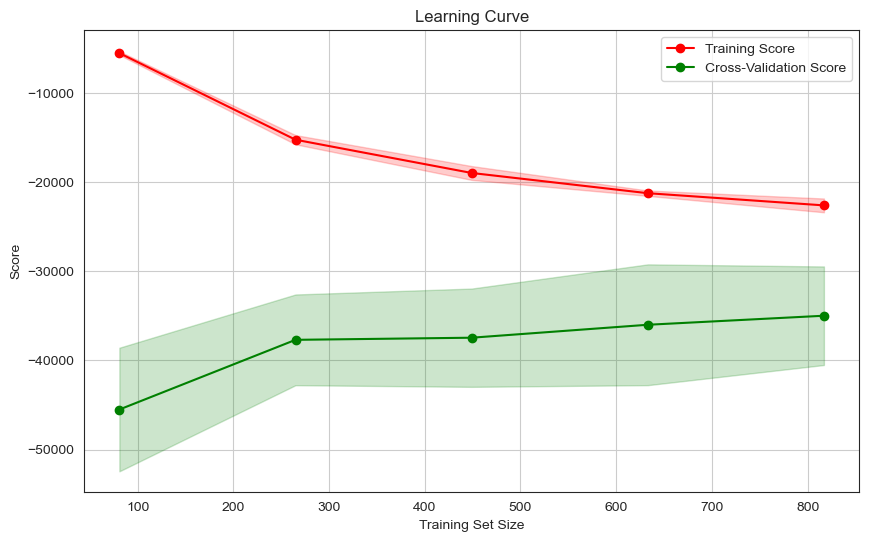

In [81]:
plot_learning_curve(pipe_gb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## XGBOOST
### With Transformer

In [82]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_tf = RandomizedSearchCV(estimator=pipe_xgb_tf, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 12.5 s
Wall time: 8min 55s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [83]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_tf = round(random_search_xgb_tf.cv_results_["std_test_score"][random_search_xgb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_tf.best_params_)
print("Best score: ", random_search_xgb_tf.best_score_, f" ({std_xgb_tf})")

# valuate model on validation data
r2_train_xgb_tf = random_search_xgb_tf.score(X_val, y_val)

best_model_xgb_tf = random_search_xgb_tf.best_estimator_
y_pred_val_xgb_tf = best_model_xgb_tf.predict(X_val)

# Compute the evaluation metrics
mae_xgb_tf, mse_xgb_tf, rmse_xgb_tf, r2_xgb_tf, rmsle_xgb_tf, mape_xgb_tf = evaluate_model(y_pred_val_xgb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_tf"
evaluation_metrics['best_params_'] = random_search_xgb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 1, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.5}
Best score:  0.8403505110154784  (0.0822)
model: xgb_tf
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.5}
MAE: 15711.425309
MSE: 573777102.435047
RMSE: 23953.644867
R2_train: 0.917775
R2: 0.917775
RMSLE: 0.130747
MAPE: 9.351975


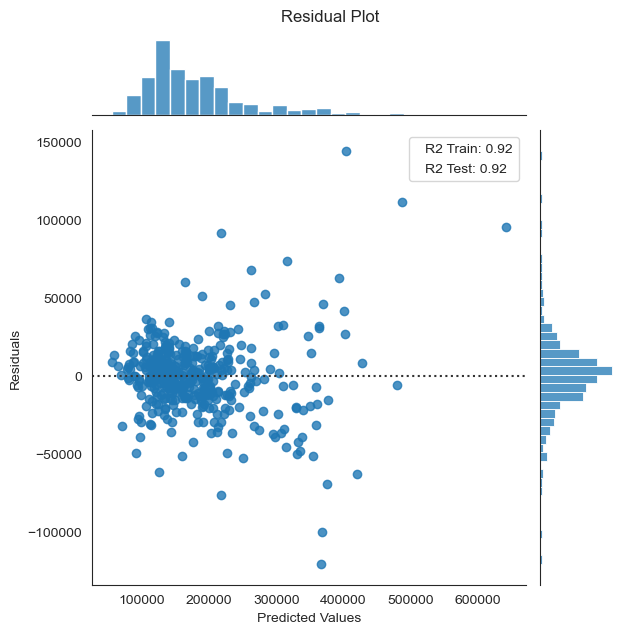

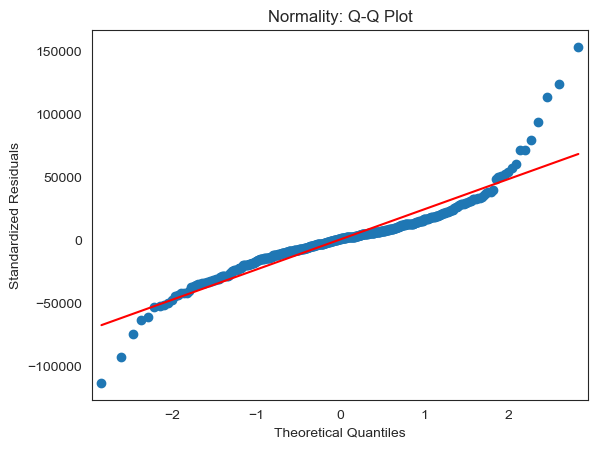

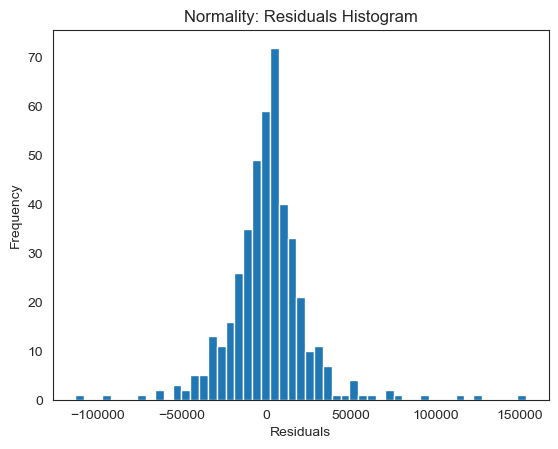

Shapiro-Wilk Test:
Test Statistic: 0.8891030550003052
p-value: 3.0530369524050296e-17
The residuals do not appear to be normally distributed (reject H0)


In [84]:
residual_plot(y_val, y_pred_val_xgb_tf, r2_train=r2_train_xgb_tf, r2_test=r2_xgb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

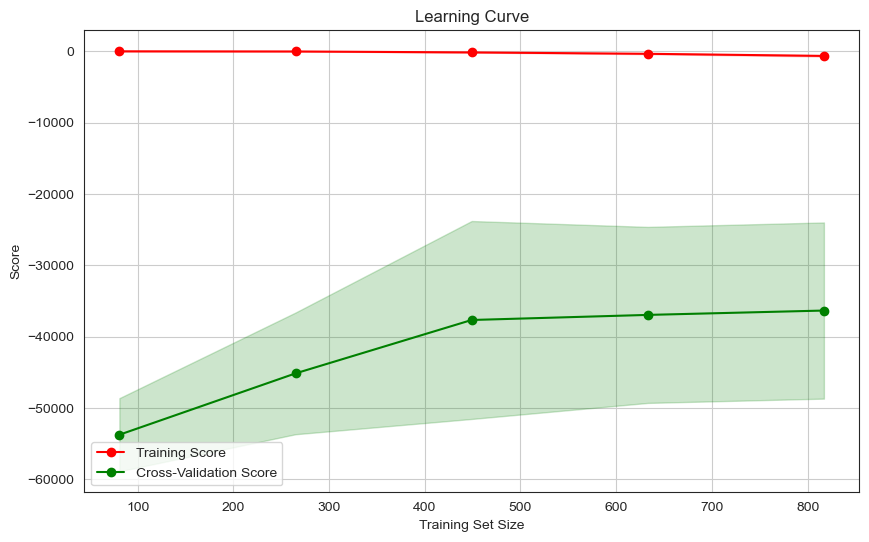

In [85]:
plot_learning_curve(pipe_xgb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [86]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts = RandomizedSearchCV(estimator=pipe_xgb_ts, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 8.33 s
Wall time: 8min 37s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [87]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts = round(random_search_xgb_ts.cv_results_["std_test_score"][random_search_xgb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts.best_params_)
print("Best score: ", random_search_xgb_ts.best_score_, f" ({std_xgb_ts})")

# valuate model on validation data
r2_train_xgb_ts = random_search_xgb_ts.score(X_val, y_val)

best_model_xgb_ts = random_search_xgb_ts.best_estimator_
y_pred_val_xgb_ts = best_model_xgb_ts.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts, mse_xgb_ts, rmse_xgb_ts, r2_xgb_ts, rmsle_xgb_ts, mape_xgb_ts = evaluate_model(y_pred_val_xgb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts"
evaluation_metrics['best_params_'] = random_search_xgb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 1, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.5, 'xgb__colsample_bytree': 0.5}
Best score:  0.8416005029503942  (0.072)
model: xgb_ts
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.5, 'xgb__colsample_bytree': 0.5}
MAE: 16222.325717
MSE: 625388972.229484
RMSE: 25007.778235
R2_train: 0.910378
R2: 0.910378
RMSLE: 0.130336
MAPE: 9.432585


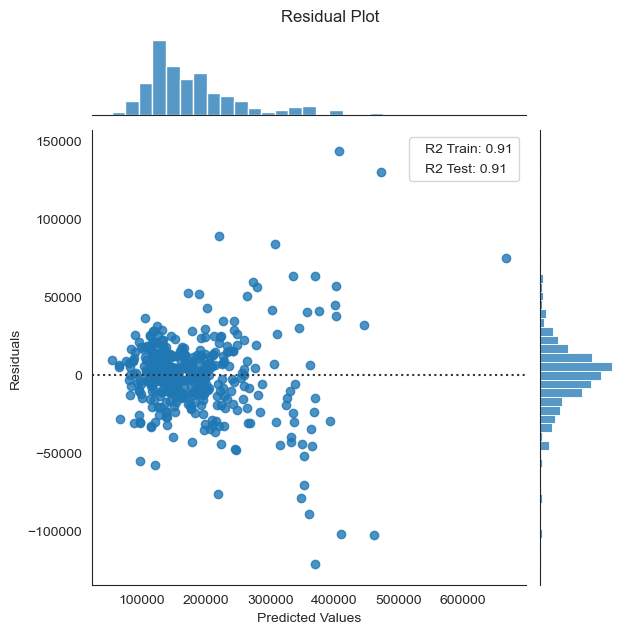

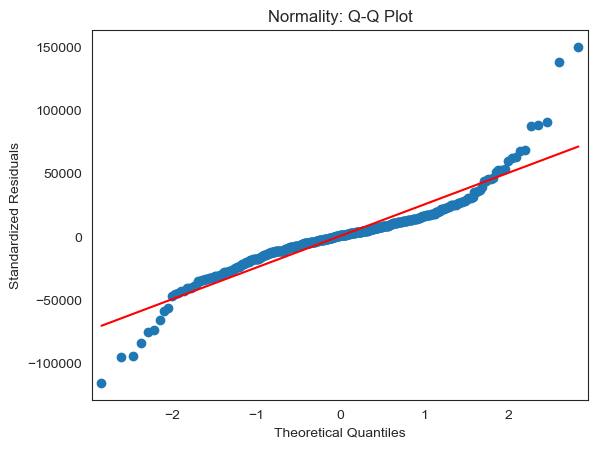

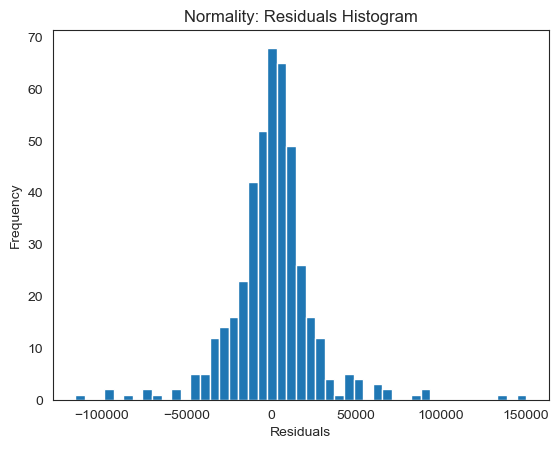

Shapiro-Wilk Test:
Test Statistic: 0.8883896470069885
p-value: 2.6807153486332763e-17
The residuals do not appear to be normally distributed (reject H0)


In [88]:
residual_plot(y_val, y_pred_val_xgb_ts, r2_train=r2_train_xgb_ts, r2_test=r2_xgb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

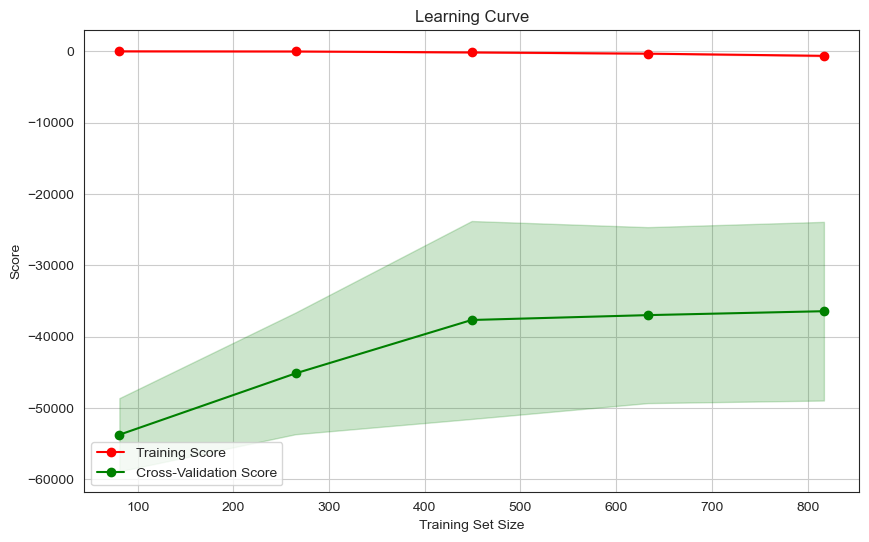

In [89]:
plot_learning_curve(pipe_xgb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [90]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts_pca = RandomizedSearchCV(estimator=pipe_xgb_ts_pca, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 8.78 s
Wall time: 2min 51s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [91]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts_pca = round(random_search_xgb_ts_pca.cv_results_["std_test_score"][random_search_xgb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts_pca.best_params_)
print("Best score: ", random_search_xgb_ts_pca.best_score_, f" ({std_xgb_ts_pca})")

# valuate model on validation data
r2_train_xgb_ts_pca = random_search_xgb_ts_pca.score(X_val, y_val)

best_model_xgb_ts_pca = random_search_xgb_ts_pca.best_estimator_
y_pred_val_xgb_ts_pca = best_model_xgb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts_pca, mse_xgb_ts_pca, rmse_xgb_ts_pca, r2_xgb_ts_pca, rmsle_xgb_ts_pca, mape_xgb_ts_pca = evaluate_model(y_pred_val_xgb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts_pca"
evaluation_metrics['best_params_'] = random_search_xgb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.5}
Best score:  0.854992613500702  (0.0564)
model: xgb_ts_pca
best_params_: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.5}
MAE: 18078.249019
MSE: 857446252.731747
RMSE: 29282.183196
R2_train: 0.877123
R2: 0.877123
RMSLE: 0.147524
MAPE: 10.665863


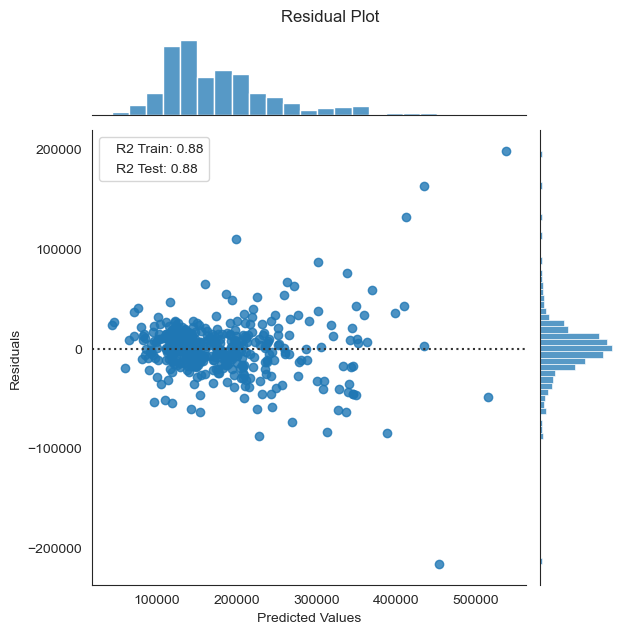

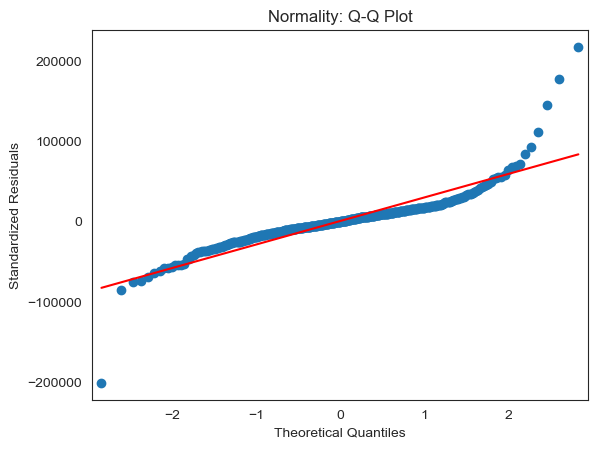

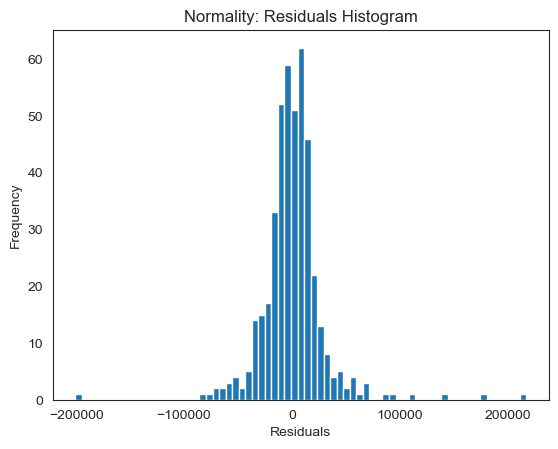

Shapiro-Wilk Test:
Test Statistic: 0.8221441507339478
p-value: 1.1347254959221589e-21
The residuals do not appear to be normally distributed (reject H0)


In [92]:
residual_plot(y_val, y_pred_val_xgb_ts_pca, r2_train=r2_train_xgb_ts_pca, r2_test=r2_xgb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

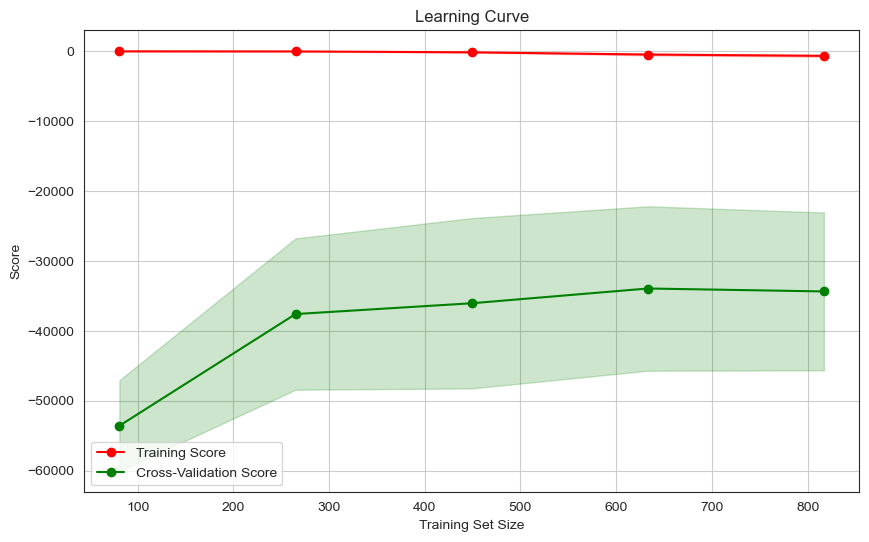

In [93]:
plot_learning_curve(pipe_xgb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Light GBM
### With Transformer

In [94]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_tf = RandomizedSearchCV(estimator=pipe_lgbm_tf, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 20.7 s
Wall time: 2min 7s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [95]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_tf = round(random_search_lgbm_tf.cv_results_["std_test_score"][random_search_lgbm_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_tf.best_params_)
print("Best score: ", random_search_lgbm_tf.best_score_, f" ({std_lgbm_tf})")

# valuate model on validation data
r2_train_lgbm_tf = random_search_lgbm_tf.score(X_val, y_val)

best_model_lgbm_tf = random_search_lgbm_tf.best_estimator_
y_pred_val_lgbm_tf = best_model_lgbm_tf.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_tf, mse_lgbm_tf, rmse_lgbm_tf, r2_lgbm_tf, rmsle_lgbm_tf, mape_lgbm_tf = evaluate_model(y_pred_val_lgbm_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_tf"
evaluation_metrics['best_params_'] = random_search_lgbm_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.7, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8533173069439333  (0.0565)
model: lgbm_tf
best_params_: {'lgbm__subsample': 0.7, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.5}
MAE: 15581.300408
MSE: 682367653.020258
RMSE: 26122.167847
R2_train: 0.902213
R2: 0.902213
RMSLE: 0.130338
MAPE: 9.193905


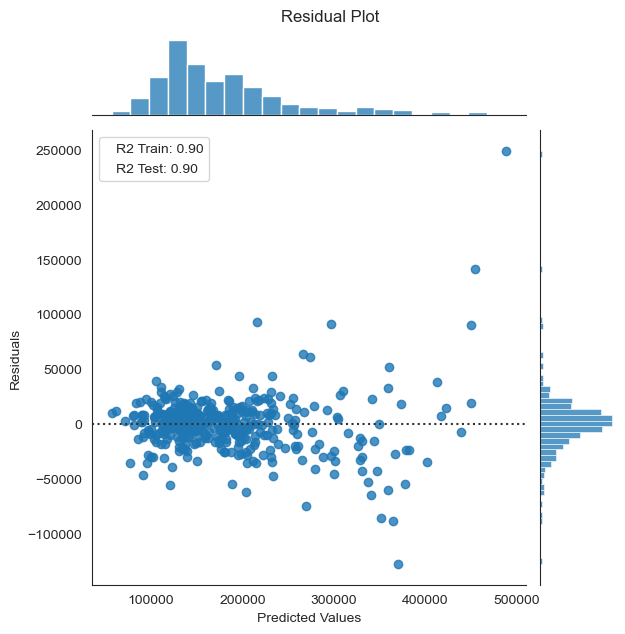

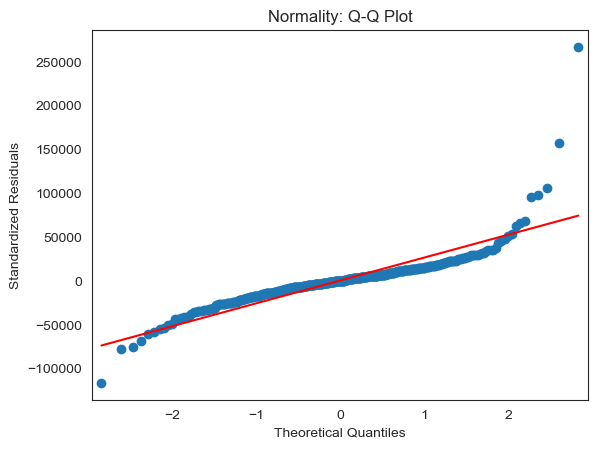

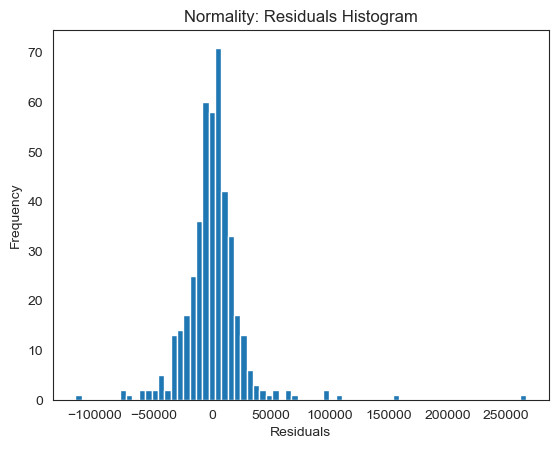

Shapiro-Wilk Test:
Test Statistic: 0.778501033782959
p-value: 6.4684156647925835e-24
The residuals do not appear to be normally distributed (reject H0)


In [96]:
residual_plot(y_val, y_pred_val_lgbm_tf, r2_train=r2_train_lgbm_tf, r2_test=r2_lgbm_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

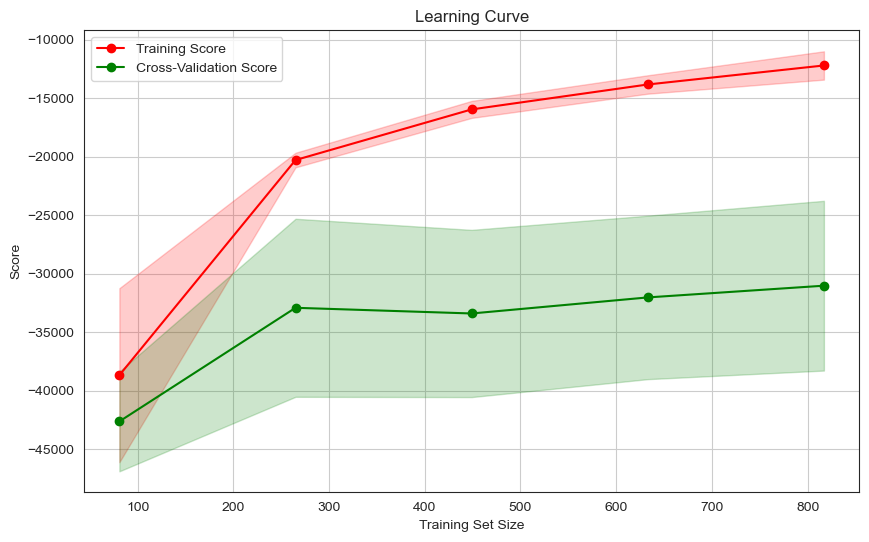

In [97]:
plot_learning_curve(pipe_lgbm_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [98]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts = RandomizedSearchCV(estimator=pipe_lgbm_ts, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 19.4 s
Wall time: 2min 15s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [99]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts = round(random_search_lgbm_ts.cv_results_["std_test_score"][random_search_lgbm_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts.best_params_)
print("Best score: ", random_search_lgbm_ts.best_score_, f" ({std_lgbm_ts})")

# valuate model on validation data
r2_train_lgbm_ts = random_search_lgbm_ts.score(X_val, y_val)

best_model_lgbm_ts = random_search_lgbm_ts.best_estimator_
y_pred_val_lgbm_ts = best_model_lgbm_ts.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts, mse_lgbm_ts, rmse_lgbm_ts, r2_lgbm_ts, rmsle_lgbm_ts, mape_lgbm_ts = evaluate_model(y_pred_val_lgbm_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts"
evaluation_metrics['best_params_'] = random_search_lgbm_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 1.0, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8534179272011226  (0.0564)
model: lgbm_ts
best_params_: {'lgbm__subsample': 1.0, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.5}
MAE: 15587.552513
MSE: 687580878.514346
RMSE: 26221.763452
R2_train: 0.901466
R2: 0.901466
RMSLE: 0.130925
MAPE: 9.204430


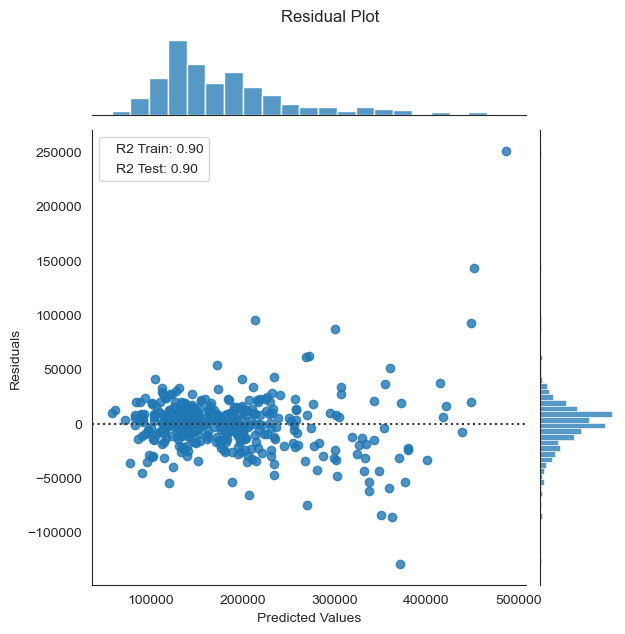

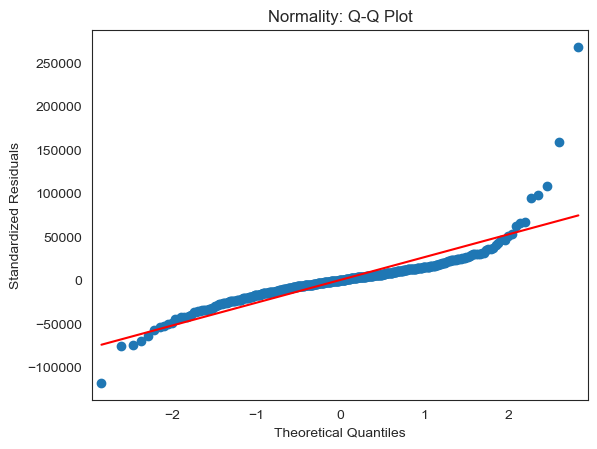

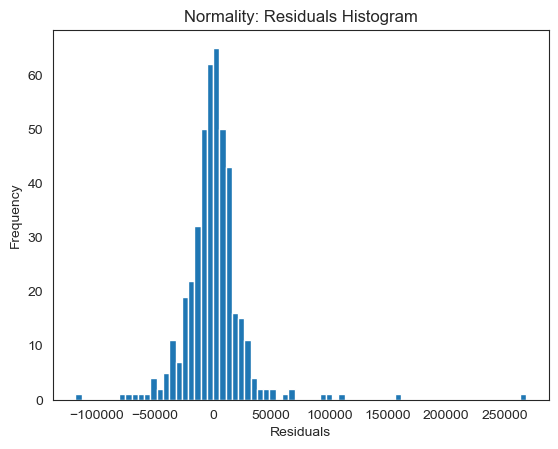

Shapiro-Wilk Test:
Test Statistic: 0.7769501209259033
p-value: 5.463934225056155e-24
The residuals do not appear to be normally distributed (reject H0)


In [100]:
residual_plot(y_val, y_pred_val_lgbm_ts, r2_train=r2_train_lgbm_ts, r2_test=r2_lgbm_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

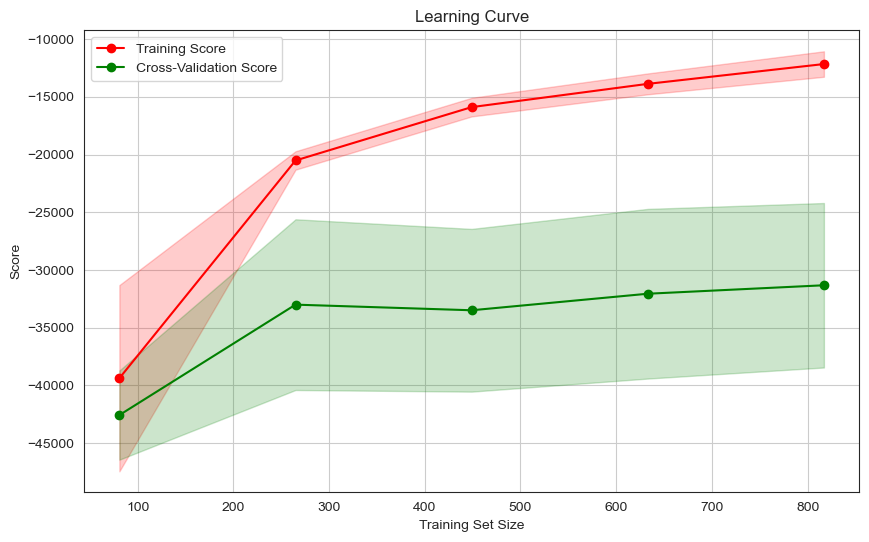

In [101]:
plot_learning_curve(pipe_lgbm_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [102]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts_pca = RandomizedSearchCV(estimator=pipe_lgbm_ts_pca, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 14.4 s
Wall time: 2min


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [103]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts_pca = round(random_search_lgbm_ts_pca.cv_results_["std_test_score"][random_search_lgbm_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts_pca.best_params_)
print("Best score: ", random_search_lgbm_ts_pca.best_score_, f" ({std_lgbm_ts_pca})")

# valuate model on validation data
r2_train_lgbm_ts_pca = random_search_lgbm_ts_pca.score(X_val, y_val)

best_model_lgbm_ts_pca = random_search_lgbm_ts_pca.best_estimator_
y_pred_val_lgbm_ts_pca = best_model_lgbm_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts_pca, mse_lgbm_ts_pca, rmse_lgbm_ts_pca, r2_lgbm_ts_pca, rmsle_lgbm_ts_pca, mape_lgbm_ts_pca = evaluate_model(y_pred_val_lgbm_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts_pca"
evaluation_metrics['best_params_'] = random_search_lgbm_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 0.7}
Best score:  0.8519718542930033  (0.0468)
model: lgbm_ts_pca
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 0.7}
MAE: 18234.508757
MSE: 844899784.781154
RMSE: 29067.159902
R2_train: 0.878921
R2: 0.878921
RMSLE: 0.147302
MAPE: 10.778178


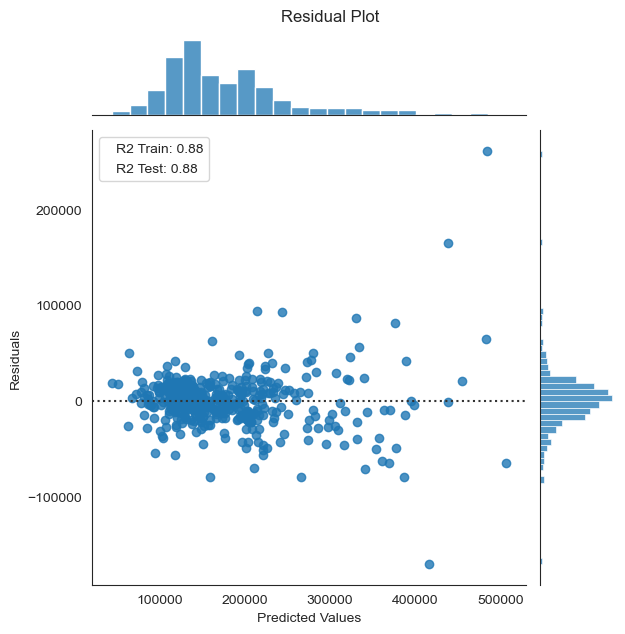

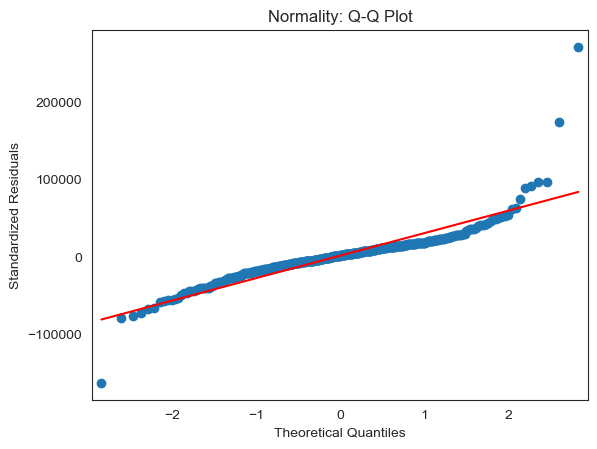

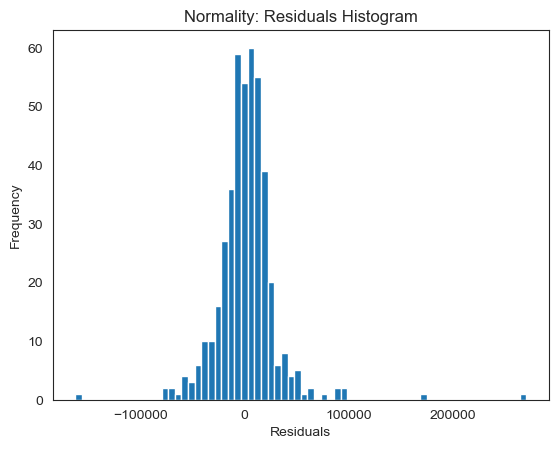

Shapiro-Wilk Test:
Test Statistic: 0.819286048412323
p-value: 7.867650343244717e-22
The residuals do not appear to be normally distributed (reject H0)


In [104]:
residual_plot(y_val, y_pred_val_lgbm_ts_pca, r2_train=r2_train_lgbm_ts_pca, r2_test=r2_lgbm_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

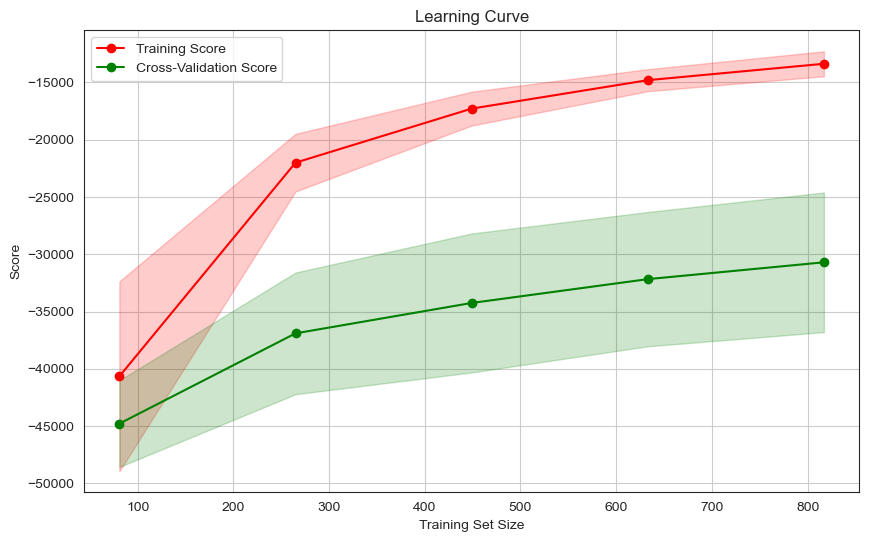

In [105]:
plot_learning_curve(pipe_lgbm_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## KNN Regressor
### With Transformer

In [106]:
%%time
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_tf = GridSearchCV(pipe_knn_tf, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 1.14 s
Wall time: 10.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [107]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_tf = round(grid_search_knn_tf.cv_results_["std_test_score"][grid_search_knn_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_tf.best_params_)
print("Best score: ", grid_search_knn_tf.best_score_, f" ({std_knn_tf})")

# valuate model on validation data
r2_train_knn_tf = grid_search_knn_tf.score(X_val, y_val)

best_model_knn_tf = grid_search_knn_tf.best_estimator_
y_pred_val_knn_tf = best_model_knn_tf.predict(X_val)

# Compute the evaluation metrics
mae_knn_tf, mse_knn_tf, rmse_knn_tf, r2_knn_tf, rmsle_knn_tf, mape_knn_tf = evaluate_model(y_pred_val_knn_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_tf"
evaluation_metrics['best_params_'] = grid_search_knn_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.7829327682380942  (0.0463)
model: knn_tf
best_params_: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 20779.357580
MSE: 1188241527.483969
RMSE: 34470.879413
R2_train: 0.829718
R2: 0.829718
RMSLE: 0.168519
MAPE: 11.777468


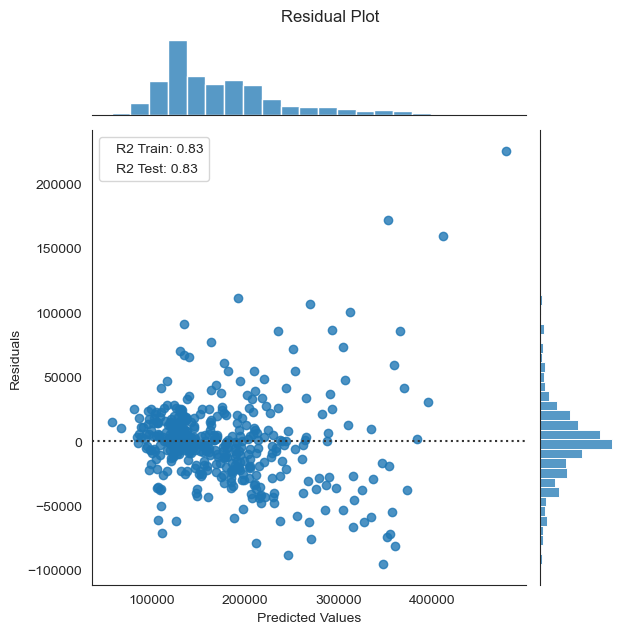

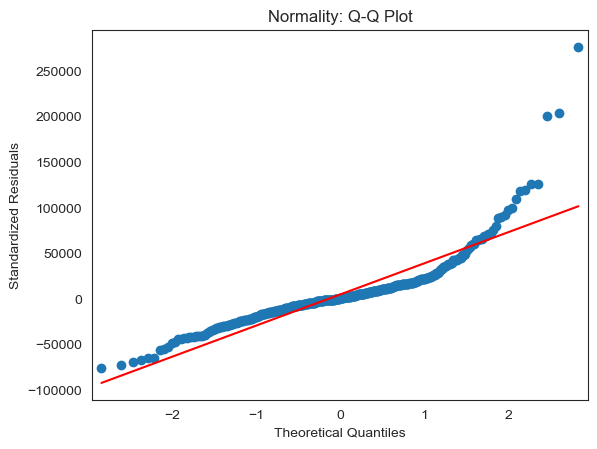

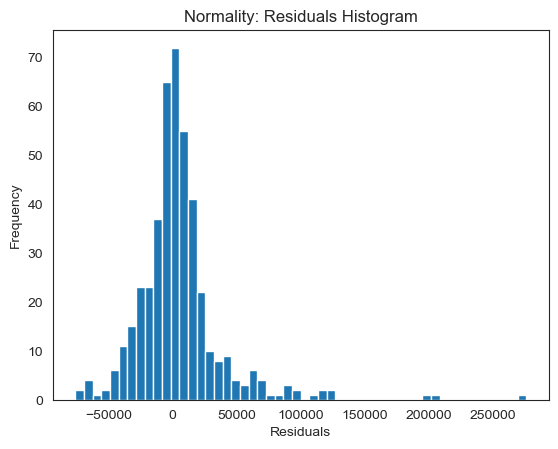

Shapiro-Wilk Test:
Test Statistic: 0.8094117641448975
p-value: 2.2939875699790183e-22
The residuals do not appear to be normally distributed (reject H0)


In [108]:
residual_plot(y_val, y_pred_val_knn_tf, r2_train=r2_train_knn_tf, r2_test=r2_knn_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

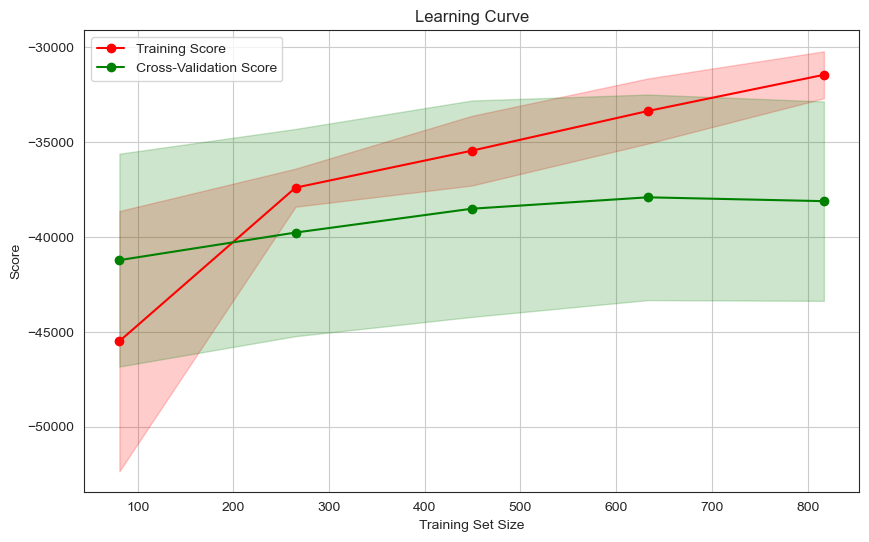

In [109]:
plot_learning_curve(pipe_knn_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [110]:
%%time
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts = GridSearchCV(pipe_knn_ts, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 1.55 s
Wall time: 11 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [111]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts = round(grid_search_knn_ts.cv_results_["std_test_score"][grid_search_knn_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts.best_params_)
print("Best score: ", grid_search_knn_ts.best_score_, f" ({std_knn_ts})")

# valuate model on validation data
r2_train_knn_ts = grid_search_knn_ts.score(X_val, y_val)

best_model_knn_ts = grid_search_knn_ts.best_estimator_
y_pred_val_knn_ts = best_model_knn_ts.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts, mse_knn_ts, rmse_knn_ts, r2_knn_ts, rmsle_knn_ts, mape_knn_ts = evaluate_model(y_pred_val_knn_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts"
evaluation_metrics['best_params_'] = grid_search_knn_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.781486042166474  (0.041)
model: knn_ts
best_params_: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 21051.146270
MSE: 1198866151.474823
RMSE: 34624.646590
R2_train: 0.828196
R2: 0.828196
RMSLE: 0.171711
MAPE: 12.066446


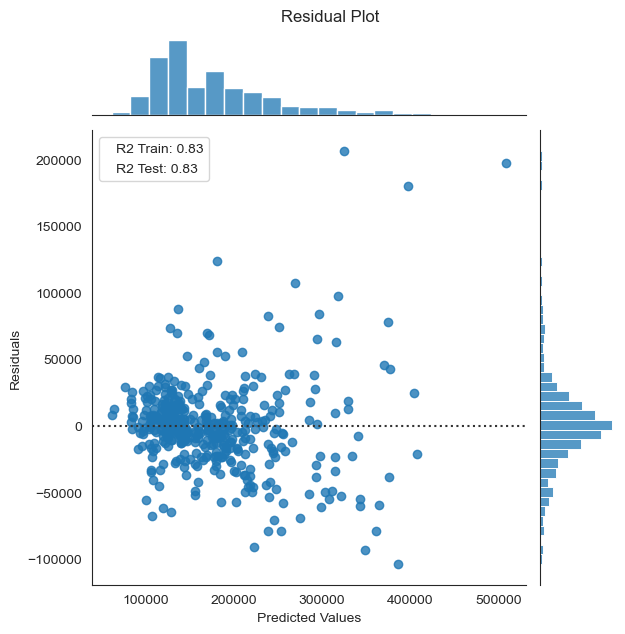

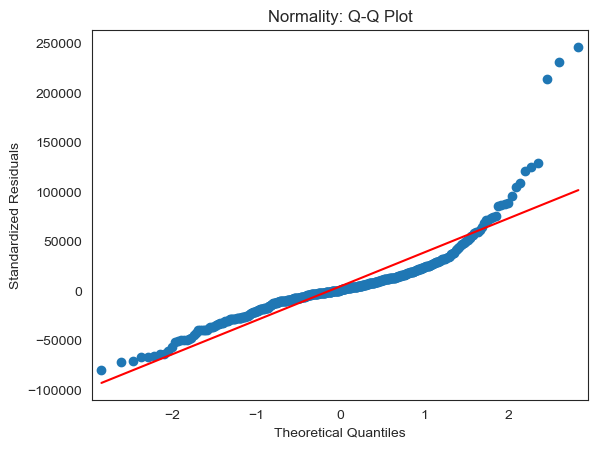

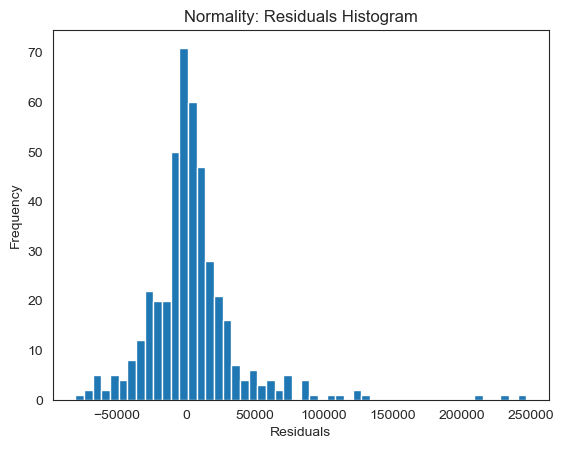

Shapiro-Wilk Test:
Test Statistic: 0.8197622299194336
p-value: 8.360108564688075e-22
The residuals do not appear to be normally distributed (reject H0)


In [112]:
residual_plot(y_val, y_pred_val_knn_ts, r2_train=r2_train_knn_ts, r2_test=r2_knn_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

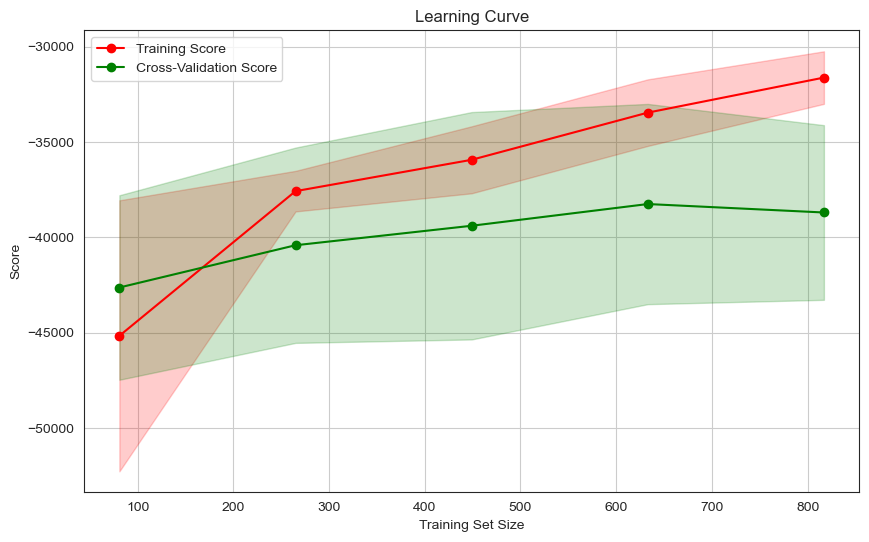

In [113]:
plot_learning_curve(pipe_knn_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [114]:
%%time
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts_pca = GridSearchCV(pipe_knn_ts_pca, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 3.09 s
Wall time: 15.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [115]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts_pca = round(grid_search_knn_ts_pca.cv_results_["std_test_score"][grid_search_knn_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts_pca.best_params_)
print("Best score: ", grid_search_knn_ts_pca.best_score_, f" ({std_knn_ts_pca})")

# valuate model on validation data
r2_train_knn_ts_pca = grid_search_knn_ts_pca.score(X_val, y_val)

best_model_knn_ts_pca = grid_search_knn_ts_pca.best_estimator_
y_pred_val_knn_ts_pca = best_model_knn_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts_pca, mse_knn_ts_pca, rmse_knn_ts_pca, r2_knn_ts_pca, rmsle_knn_ts_pca, mape_knn_ts_pca = evaluate_model(y_pred_val_knn_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts_pca"
evaluation_metrics['best_params_'] = grid_search_knn_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
Best score:  0.7606658052761816  (0.0321)
model: knn_ts_pca
best_params_: {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
MAE: 22587.370765
MSE: 1441180286.703135
RMSE: 37962.880379
R2_train: 0.793471
R2: 0.793471
RMSLE: 0.174976
MAPE: 12.798057


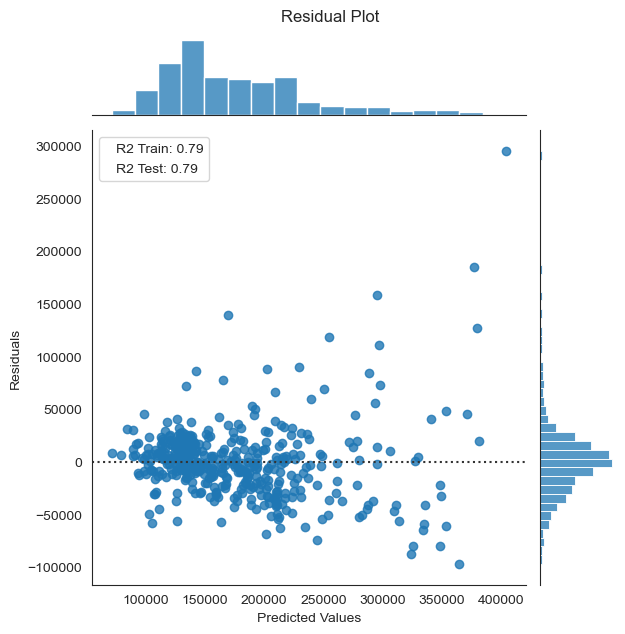

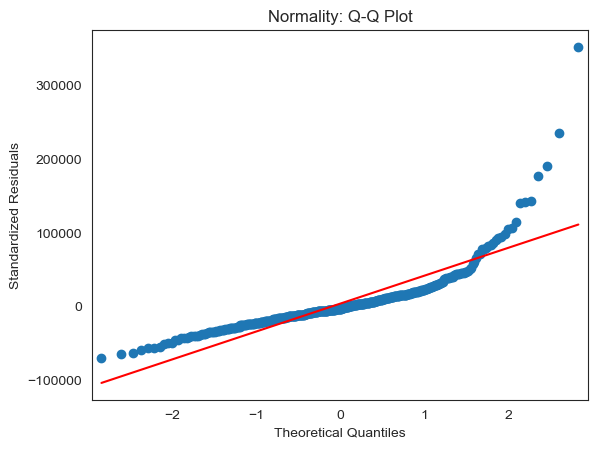

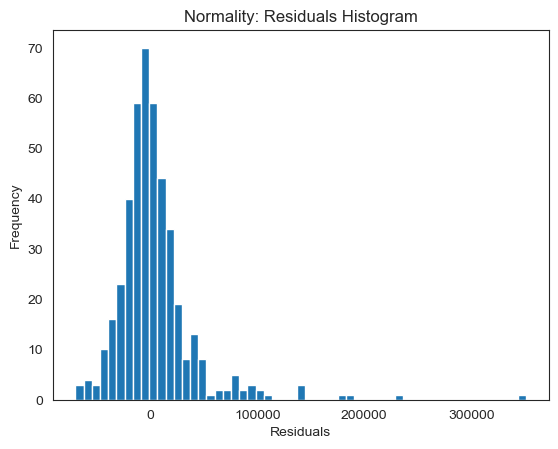

Shapiro-Wilk Test:
Test Statistic: 0.7542107701301575
p-value: 5.074196410147969e-25
The residuals do not appear to be normally distributed (reject H0)


In [116]:
residual_plot(y_val, y_pred_val_knn_ts_pca, r2_train=r2_train_knn_ts_pca, r2_test=r2_knn_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

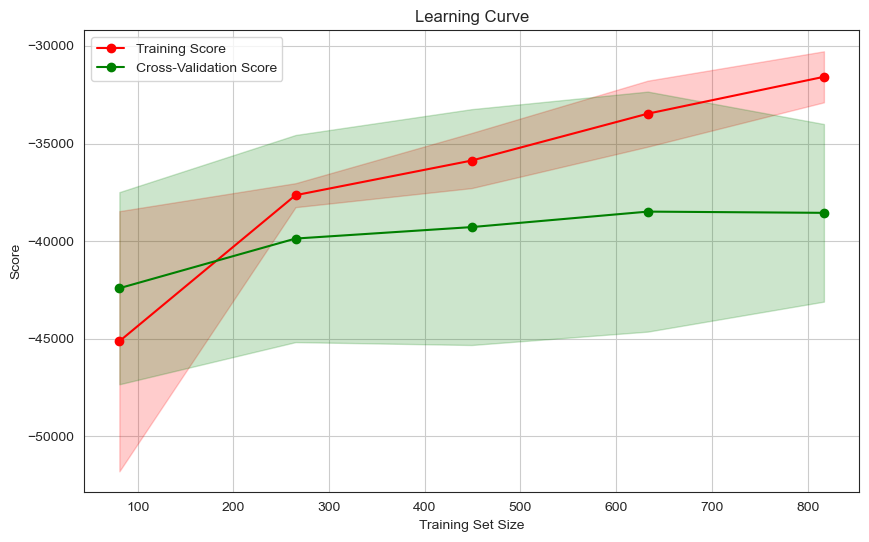

In [117]:
plot_learning_curve(pipe_knn_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## SVR
### With Transformer

In [118]:
from datetime import datetime

datetime.now()

datetime.datetime(2023, 7, 12, 18, 23, 56, 961956)

In [119]:
%%time
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['linear', 'rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_tf = GridSearchCV(pipe_svr_tf, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 6.97 s
Wall time: 1min 47s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='r2', verbose=1)

In [120]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_tf = round(grid_search_svr_tf.cv_results_["std_test_score"][grid_search_svr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_tf.best_params_)
print("Best score: ", grid_search_svr_tf.best_score_, f" ({std_svr_tf})")

# valuate model on validation data
r2_train_svr_tf = grid_search_svr_tf.score(X_val, y_val)

best_model_svr_tf = grid_search_svr_tf.best_estimator_
y_pred_val_svr_tf = best_model_svr_tf.predict(X_val)

# Compute the evaluation metrics
mae_svr_tf, mse_svr_tf, rmse_svr_tf, r2_svr_tf, rmsle_svr_tf, mape_svr_tf = evaluate_model(y_pred_val_svr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_tf"
evaluation_metrics['best_params_'] = grid_search_svr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1000, 'svr__gamma': 0.01, 'svr__kernel': 'poly'}
Best score:  0.8197126385464129  (0.1381)
model: svr_tf
best_params_: {'svr__C': 1000, 'svr__gamma': 0.01, 'svr__kernel': 'poly'}
MAE: 15668.575946
MSE: 663330557.372228
RMSE: 25755.204472
R2_train: 0.904941
R2: 0.904941
RMSLE: 0.131606
MAPE: 9.269302


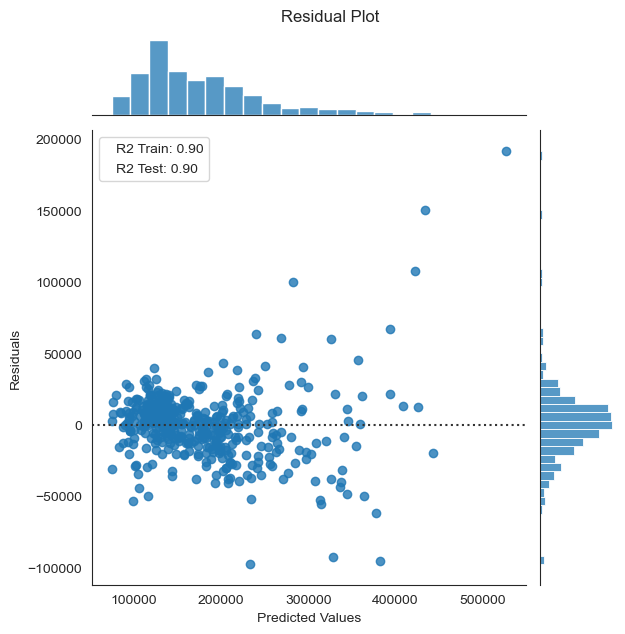

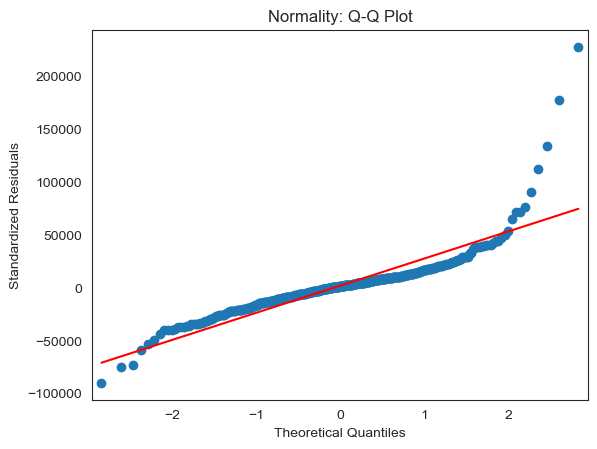

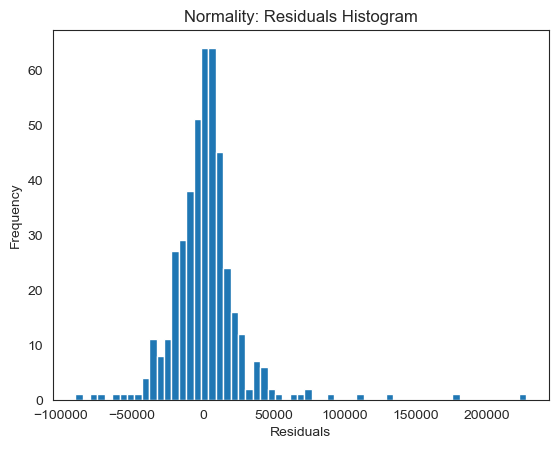

Shapiro-Wilk Test:
Test Statistic: 0.7965933084487915
p-value: 4.9684826393534987e-23
The residuals do not appear to be normally distributed (reject H0)


In [121]:
residual_plot(y_val, y_pred_val_svr_tf, r2_train=r2_train_svr_tf, r2_test=r2_svr_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

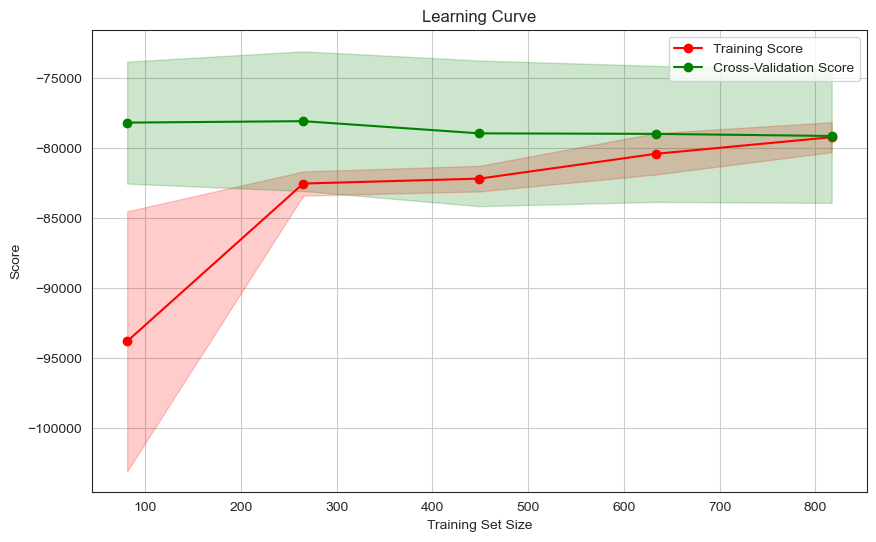

In [122]:
plot_learning_curve(pipe_svr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

In [143]:
pd.DataFrame(grid_search_svr_tf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.437285      0.046273         0.063614        0.004154   
1         0.455058      0.059188         0.145941        0.016172   
2         0.471664      0.063481         0.077769        0.031161   
3         0.481299      0.030089         0.065959        0.016488   
4         0.479803      0.048460         0.297766        0.200969   
..             ...           ...              ...             ...   
142       0.530033      0.012690         0.387216        0.192102   
143       3.481495      0.246427         0.051394        0.008061   
144       0.649740      0.090011         0.058360        0.010445   
145       0.484810      0.036633         0.241101        0.177214   
146       2.687868      0.211384         0.032114        0.007223   

    param_svr__C param_svr__gamma param_svr__kernel  \
0          0.001            0.001            linear   
1          0.001            0.001               rbf   
2          0.001            0.001              poly   
3          0.001             0.01            linear   
4          0.001             0.01               rbf   
..           ...              ...               ...   
142         1000              100               rbf   
143         1000              100              poly   
144         1000             1000            linear   
145         1000             1000               rbf   
146         1000             1000              poly   

                                                params  split0_test_score  \
0    {'svr__C': 0.001, 'svr__gamma': 0.001, 'svr__k...          -0.081290   
1    {'svr__C': 0.001, 'svr__gamma': 0.001, 'svr__k...          -0.081418   
2    {'svr__C': 0.001, 'svr__gamma': 0.001, 'svr__k...          -0.081419   
3    {'svr__C': 0.001, 'svr__gamma': 0.01, 'svr__ke...          -0.081290   
4    {'svr__C': 0.001, 'svr__gamma': 0.01, 'svr__ke...          -0.081418   
..                                                 ...                ...   
142  {'svr__C': 1000, 'svr__gamma': 100, 'svr__kern...          -0.082858   
143  {'svr__C': 1000, 'svr__gamma': 100, 'svr__kern...           0.878452   
144  {'svr__C': 1000, 'svr__gamma': 1000, 'svr__ker...           0.808654   
145  {'svr__C': 1000, 'svr__gamma': 1000, 'svr__ker...          -0.082858   
146  {'svr__C': 1000, 'svr__gamma': 1000, 'svr__ker...           0.878455   

     split1_test_score  split2_test_score  split3_test_score  \
0            -0.048369          -0.015050          -0.031287   
1            -0.048532          -0.015226          -0.031437   
2            -0.048533          -0.015226          -0.031438   
3            -0.048369          -0.015050          -0.031287   
4            -0.048532          -0.015225          -0.031437   
..                 ...                ...                ...   
142          -0.049893          -0.015649          -0.030816   
143           0.013056           0.891208           0.866428   
144           0.669121           0.854857           0.862334   
145          -0.049906          -0.015649          -0.030817   
146           0.013033           0.891209           0.866429   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            -0.057341        -0.046667        0.022591               98  
1            -0.057517        -0.046826        0.022580              116  
2            -0.057517        -0.046826        0.022580              118  
3            -0.057341        -0.046667        0.022591               98  
4            -0.057516        -0.046826        0.022580              114  
..                 ...              ...             ...              ...  
142          -0.058339        -0.047511        0.023092              146  
143           0.862189         0.702266        0.344754               33  
144           0.867645         0.812522        0.074687                4  
145          -0.058339        -0.047514        0.023093              14

### With Transformer + Scaler

In [123]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['linear', 'rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts = GridSearchCV(pipe_svr_ts, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='r2', verbose=1)

In [124]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts = round(grid_search_svr_ts.cv_results_["std_test_score"][grid_search_svr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts.best_params_)
print("Best score: ", grid_search_svr_ts.best_score_, f" ({std_svr_ts})")

# valuate model on validation data
r2_train_svr_ts = grid_search_svr_ts.score(X_val, y_val)

best_model_svr_ts = grid_search_svr_ts.best_estimator_
y_pred_val_svr_ts = best_model_svr_ts.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts, mse_svr_ts, rmse_svr_ts, r2_svr_ts, rmsle_svr_ts, mape_svr_ts = evaluate_model(y_pred_val_svr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts"
evaluation_metrics['best_params_'] = grid_search_svr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.1, 'svr__kernel': 'poly'}
Best score:  0.8198518954339837  (0.1105)
model: svr_ts
best_params_: {'svr__C': 1, 'svr__gamma': 0.1, 'svr__kernel': 'poly'}
MAE: 16311.783877
MSE: 757641555.120228
RMSE: 27525.289374
R2_train: 0.891426
R2: 0.891426
RMSLE: 0.135400
MAPE: 9.530825


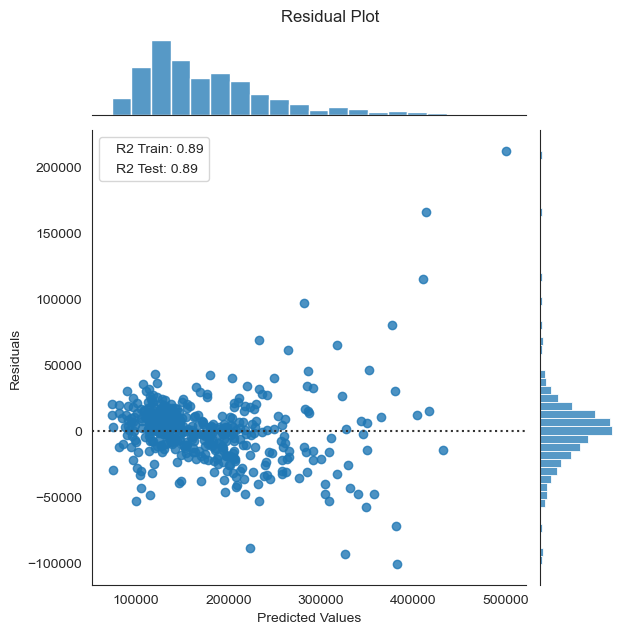

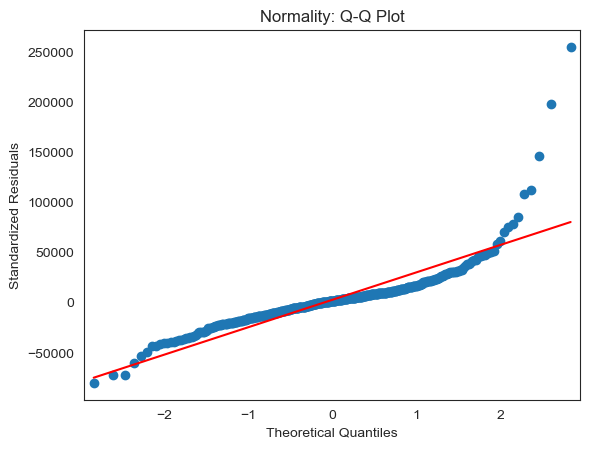

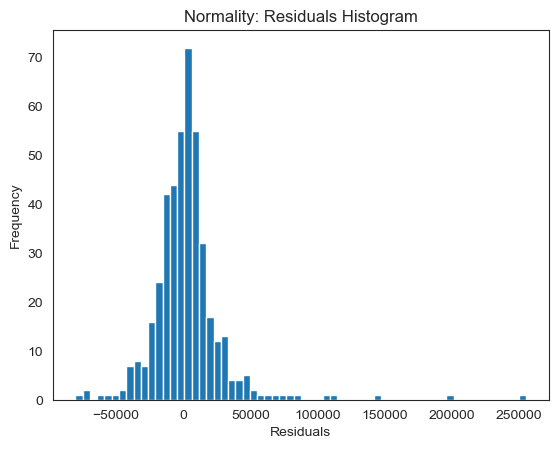

Shapiro-Wilk Test:
Test Statistic: 0.7707054615020752
p-value: 2.7944372048277556e-24
The residuals do not appear to be normally distributed (reject H0)


In [125]:
residual_plot(y_val, y_pred_val_svr_ts, r2_train=r2_train_svr_ts, r2_test=r2_svr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

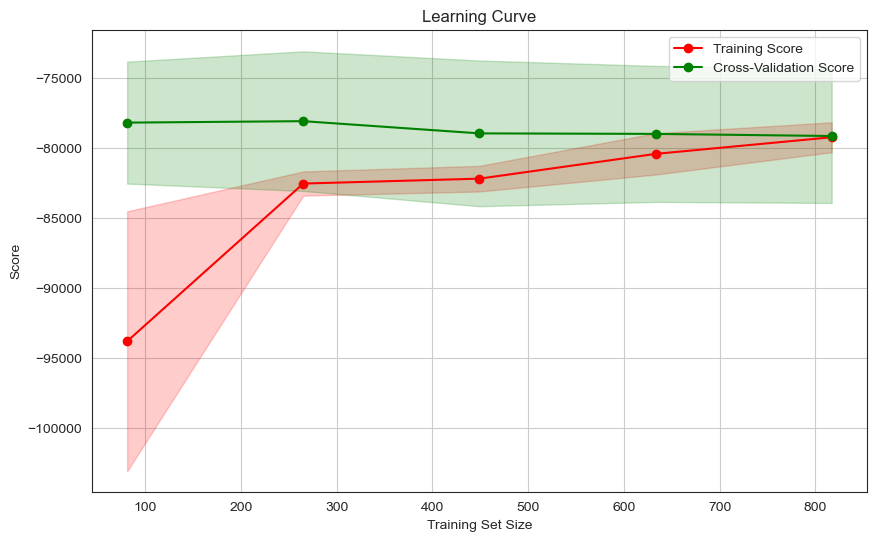

In [126]:
plot_learning_curve(pipe_svr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [127]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['linear', 'rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts_pca = GridSearchCV(pipe_svr_ts_pca, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='r2', verbose=1)

In [128]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts_pca = round(grid_search_svr_ts_pca.cv_results_["std_test_score"][grid_search_svr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts_pca.best_params_)
print("Best score: ", grid_search_svr_ts_pca.best_score_, f" ({std_svr_ts_pca})")

# valuate model on validation data
r2_train_svr_ts_pca = grid_search_svr_ts_pca.score(X_val, y_val)

best_model_svr_ts_pca = grid_search_svr_ts_pca.best_estimator_
y_pred_val_svr_ts_pca = best_model_svr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts_pca, mse_svr_ts_pca, rmse_svr_ts_pca, r2_svr_ts_pca, rmsle_svr_ts_pca, mape_svr_ts_pca = evaluate_model(y_pred_val_svr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_svr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 0.001, 'svr__gamma': 1, 'svr__kernel': 'poly'}
Best score:  0.8135316877871507  (0.0912)
model: svr_ts_pca
best_params_: {'svr__C': 0.001, 'svr__gamma': 1, 'svr__kernel': 'poly'}
MAE: 18156.602937
MSE: 895013450.987927
RMSE: 29916.775411
R2_train: 0.871740
R2: 0.871740
RMSLE: 0.145340
MAPE: 10.506270


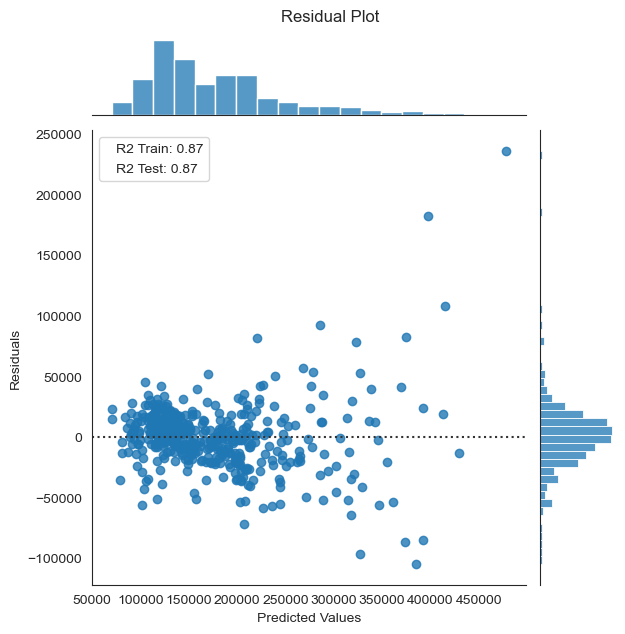

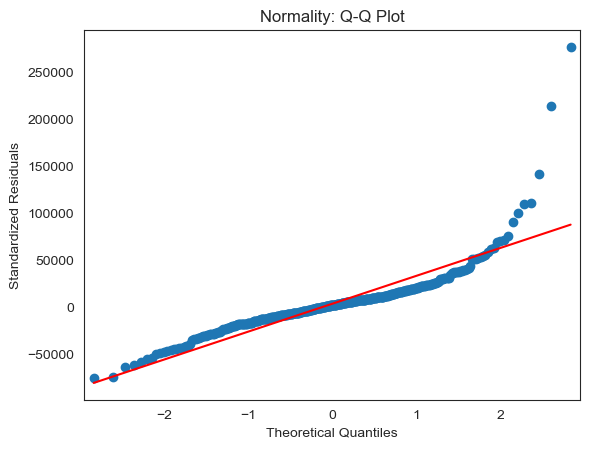

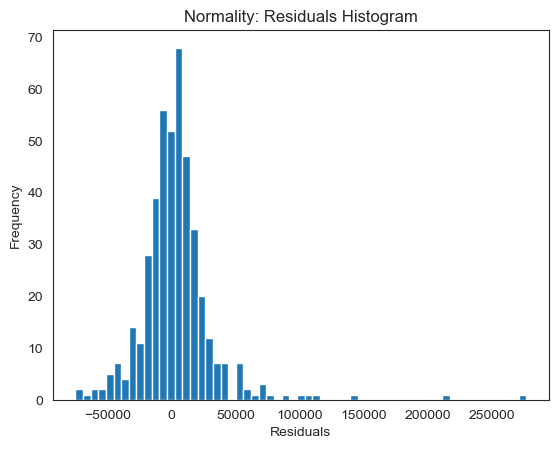

Shapiro-Wilk Test:
Test Statistic: 0.7899219989776611
p-value: 2.3066925535108372e-23
The residuals do not appear to be normally distributed (reject H0)


In [129]:
residual_plot(y_val, y_pred_val_svr_ts_pca, r2_train=r2_train_svr_ts_pca, r2_test=r2_svr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

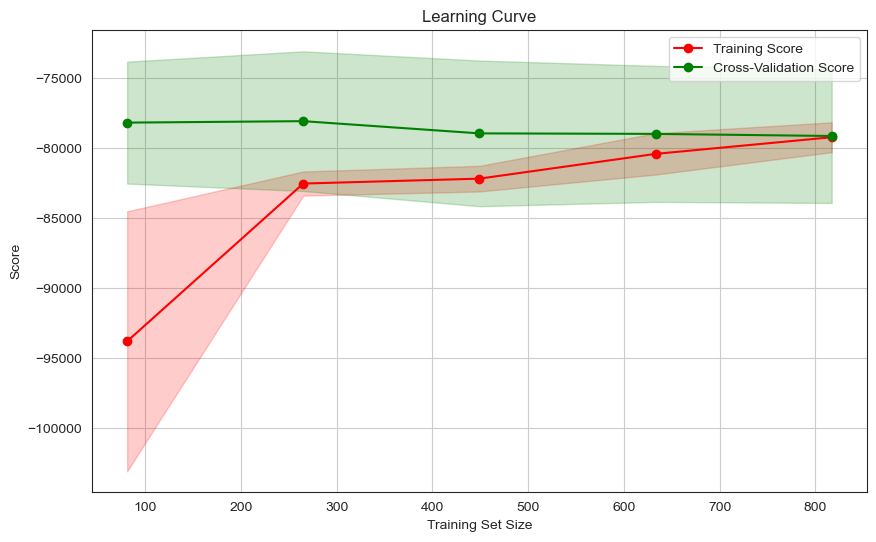

In [130]:
plot_learning_curve(pipe_svr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Voting Regressor

- linreg
- svr tf
- xgb
- gb ts

In [132]:
from sklearn.ensemble import VotingRegressor

In [144]:
%%time
model1 = pipe_linreg_ts_pca

model2 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                            use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", 
                         model=SVR(
                             C = grid_search_svr_tf.best_params_["svr__C"],
                             gamma = grid_search_svr_tf.best_params_["svr__gamma"],
                             kernel = grid_search_svr_tf.best_params_["svr__kernel"]
                         )
                        )

model3 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", 
                         model=XGBRegressor(
                             subsample = random_search_xgb_ts.best_params_["xgb__subsample"],
                             reg_lambda = random_search_xgb_ts.best_params_["xgb__reg_lambda"],
                             reg_alpha = random_search_xgb_ts.best_params_["xgb__reg_alpha"],
                             n_estimators = random_search_xgb_ts.best_params_["xgb__n_estimators"],
                             max_depth = random_search_xgb_ts.best_params_["xgb__max_depth"],
                             learning_rate = random_search_xgb_ts.best_params_["xgb__learning_rate"],
                             gamma = random_search_xgb_ts.best_params_["xgb__gamma"],
                             colsample_bytree = random_search_xgb_ts.best_params_["xgb__colsample_bytree"]
                         )
                        )

model4 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", 
                         model=GradientBoostingRegressor(
                             subsample = random_search_gb_ts.best_params_["gb__subsample"],
#                              reg_lambda = random_search_gb_ts.best_params_["gb__reg_lambda"],
#                              reg_alpha = random_search_gb_ts.best_params_["gb__reg_alpha"],
                             n_estimators = random_search_gb_ts.best_params_["gb__n_estimators"],
                             min_samples_split= random_search_gb_ts.best_params_["gb__min_samples_split"],
                             min_samples_leaf= random_search_gb_ts.best_params_["gb__min_samples_leaf"],
                             max_depth = random_search_gb_ts.best_params_["gb__max_depth"],
                             learning_rate = random_search_gb_ts.best_params_["gb__learning_rate"],
#                              gamma = random_search_gb_ts.best_params_["gb__gamma"],
#                              colsample_bytree = random_search_gb_ts.best_params_["gb__colsample_bytree"],
                             loss= random_search_gb_ts.best_params_["gb__loss"]
                         )
                        )

model5 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", 
                         model=Lasso(alpha=grid_search_lasso_ts.best_params_["lasso__alpha"])
                        )

# Create the voting Regressor within a Pipeline
pipe_voting_reg = make_pipeline(
    VotingRegressor(estimators=[('lr', model1), 
                                ('svr', model2), 
#                                 ('xgb', model3),
                                ('gb', model4),
                                ('lasso', model5)
                               ])
)

# Fit the voting Regressor Pipeline to your training data
# voting_regressor_pipeline.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_voting_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 30161.40 +/- 6281.11
CPU times: total: 11 s
Wall time: 18.8 s


29468
29602
28985


In [145]:
evaluation_metrics = {}

pipe_voting_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
voting_reg_pred = pipe_voting_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_voting_reg = pipe_voting_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_voting_reg, mse_voting_reg, rmse_voting_reg, r2_voting_reg, rmsle_voting_reg, mape_voting_reg = evaluate_model(voting_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "voting_reg"
evaluation_metrics['MAE'] = f'{mae_voting_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_voting_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_voting_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_voting_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_voting_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_voting_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_voting_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

# evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_reg
MAE: 16318.946034
MSE: 709440714.747561
RMSE: 26635.328321
R2_train: 0.932558
R2: 0.898333
RMSLE: 0.134689
MAPE: 9.699635


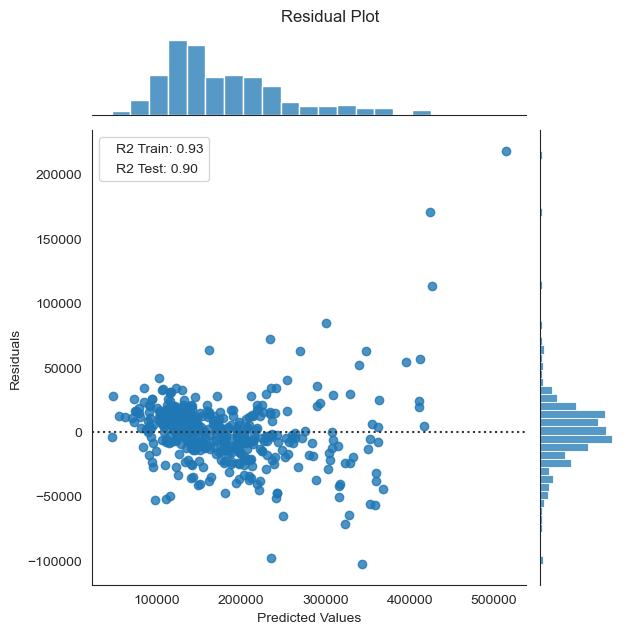

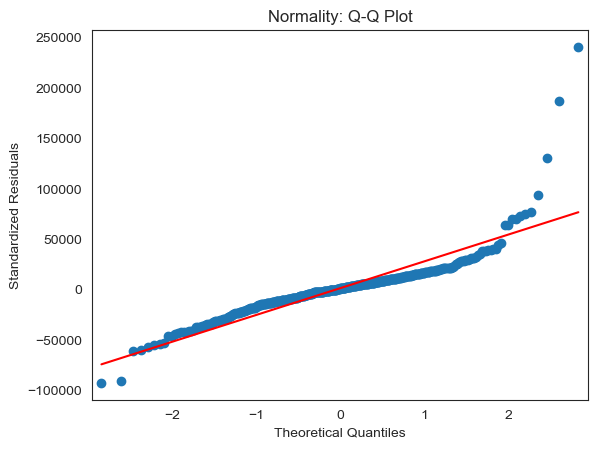

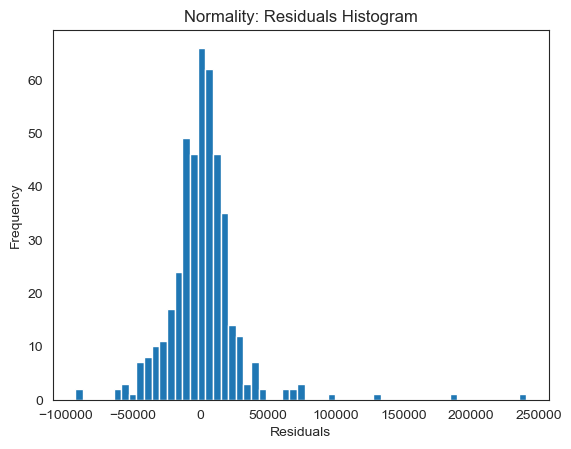

Shapiro-Wilk Test:
Test Statistic: 0.8018121719360352
p-value: 9.178293764784432e-23
The residuals do not appear to be normally distributed (reject H0)


In [146]:
residual_plot(y_val, voting_reg_pred, r2_train=r2_train_voting_reg, r2_test=r2_voting_reg)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

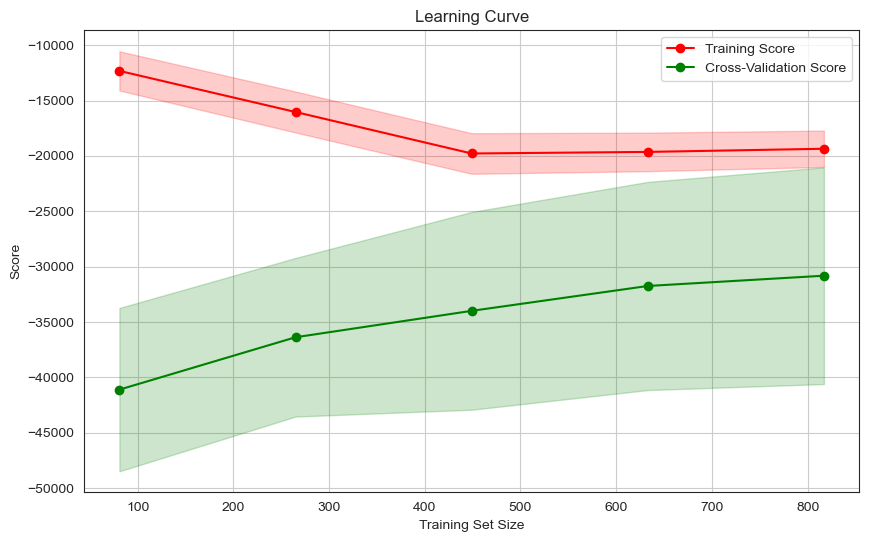

In [147]:
plot_learning_curve(pipe_voting_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Stacking Regressor

In [148]:
from sklearn.ensemble import StackingRegressor

In [149]:
%%time

# Create the stacking Regressor within a Pipeline
pipe_stacking_reg = make_pipeline(
    StackingRegressor(estimators=[('lr', model1), 
                                ('svr', model2), 
#                                 ('xgb', model3),
                                ('gb', model4),
                                ('lasso', model5)
                                 ],
                      final_estimator=LinearRegression())
)

# Fit the stacking Regressor Pipeline to your training data
# pipe_stacking_reg.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_stacking_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 31876.28 +/- 8622.13
CPU times: total: 51.7 s
Wall time: 1min 52s


In [150]:
evaluation_metrics = {}

pipe_stacking_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
stacking_reg = pipe_stacking_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_stacking_reg = pipe_stacking_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_stacking_reg, mse_stacking_reg, rmse_stacking_reg, r2_stacking_reg, rmsle_stacking_reg, mape_stacking_reg = evaluate_model(stacking_reg, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "stacking_reg"
evaluation_metrics['MAE'] = f'{mae_stacking_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_stacking_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_stacking_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_stacking_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_stacking_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_stacking_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_stacking_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

# evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

model: stacking_reg
MAE: 15202.176241
MSE: 632526334.481987
RMSE: 25150.076232
R2_train: 0.953981
R2: 0.909355
RMSLE: 0.128318
MAPE: 9.021732


model: stacking_reg
MAE: 15470.606441
MSE: 649020026.598092
RMSE: 25475.871459
R2_train: 0.953706
R2: 0.906992
RMSLE: 0.127869
MAPE: 9.107975

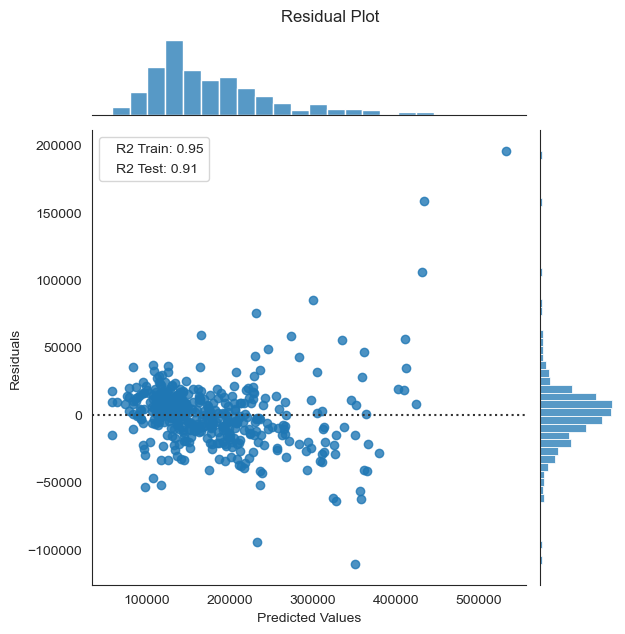

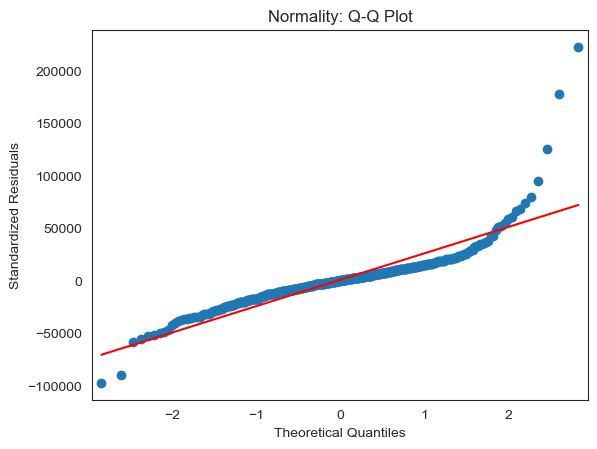

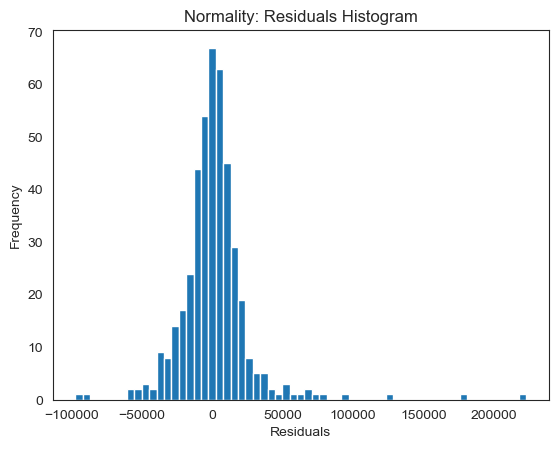

Shapiro-Wilk Test:
Test Statistic: 0.7951645255088806
p-value: 4.2088673322439265e-23
The residuals do not appear to be normally distributed (reject H0)


In [151]:
residual_plot(y_val, stacking_reg, r2_train=r2_train_stacking_reg, r2_test=r2_stacking_reg)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning:

overflow encountered in reduce

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_pro

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

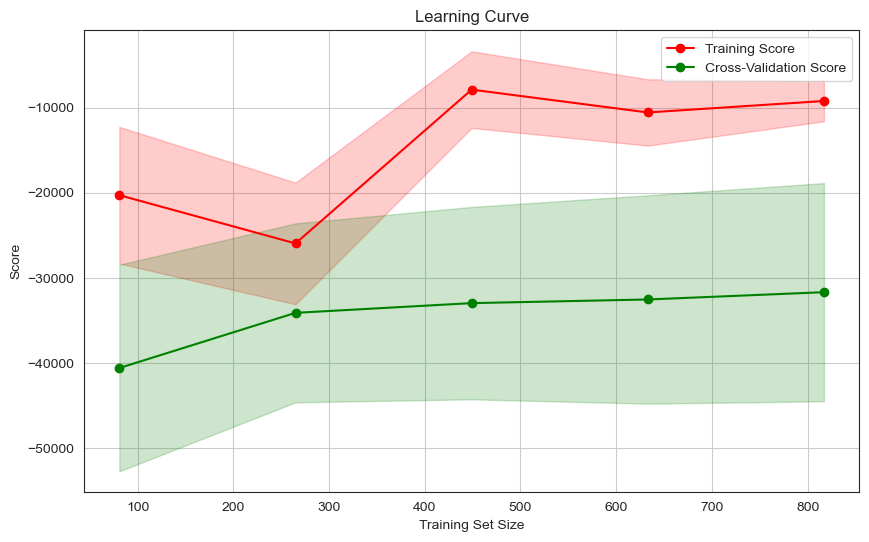

In [152]:
plot_learning_curve(pipe_stacking_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Simple Averaging Model

In [153]:
class SimpleAveragingModel(BaseEstimator, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=1)

In [154]:
%%time

# Create the list of models
models = [model1, model2, model4, model5]

# Create the Simple Averaging Model pipeline
pipe_simple_avg_model = Pipeline([
    ('averaging', SimpleAveragingModel(models))
])

# Fit the stacking Regressor Pipeline to your training data
# pipe_simple_avg_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_simple_avg_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 30179.13 +/- 6524.85
CPU times: total: 11.6 s
Wall time: 16.6 s


In [155]:
evaluation_metrics = {}

pipe_simple_avg_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
simple_avg_model_pred = pipe_simple_avg_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_simple_avg_model = r2_score(y_train_val, pipe_simple_avg_model.predict(X_train_val))

# Compute the evaluation metrics
mae_simple_avg_model, mse_simple_avg_model, rmse_simple_avg_model, r2_simple_avg_model, rmsle_simple_avg_model, mape_simple_avg_model = evaluate_model(simple_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "simple_avg_model"
evaluation_metrics['MAE'] = f'{mae_simple_avg_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_simple_avg_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_simple_avg_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_simple_avg_model:.6f}'
evaluation_metrics['R2'] = f'{r2_simple_avg_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_simple_avg_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_simple_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: simple_avg_model
MAE: 16461.172149
MSE: 724755299.888391
RMSE: 26921.279685
R2_train: 0.932739
R2: 0.896138
RMSLE: 0.135490
MAPE: 9.791121


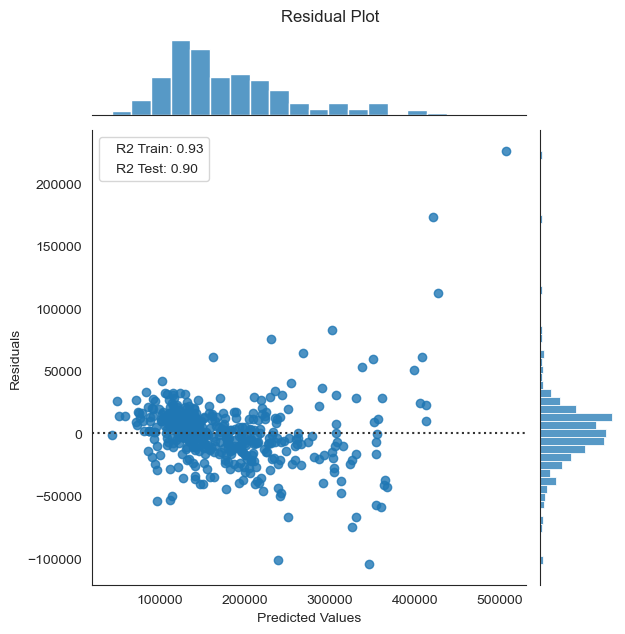

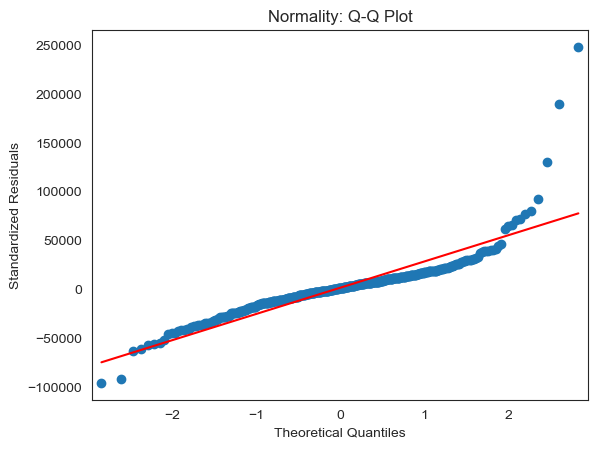

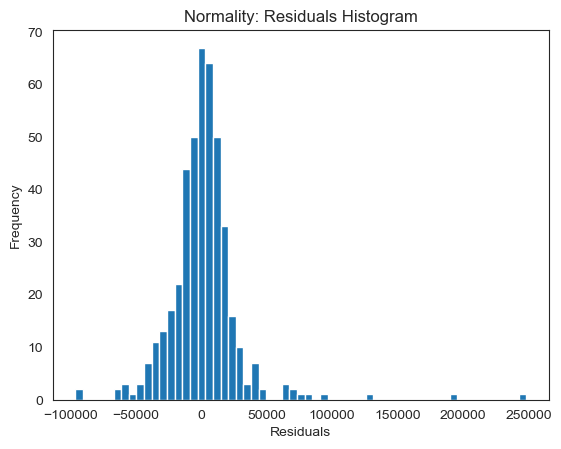

Shapiro-Wilk Test:
Test Statistic: 0.7973355054855347
p-value: 5.4176354263261e-23
The residuals do not appear to be normally distributed (reject H0)


In [157]:
residual_plot(y_val, simple_avg_model_pred, r2_train=r2_train_simple_avg_model, r2_test=r2_simple_avg_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

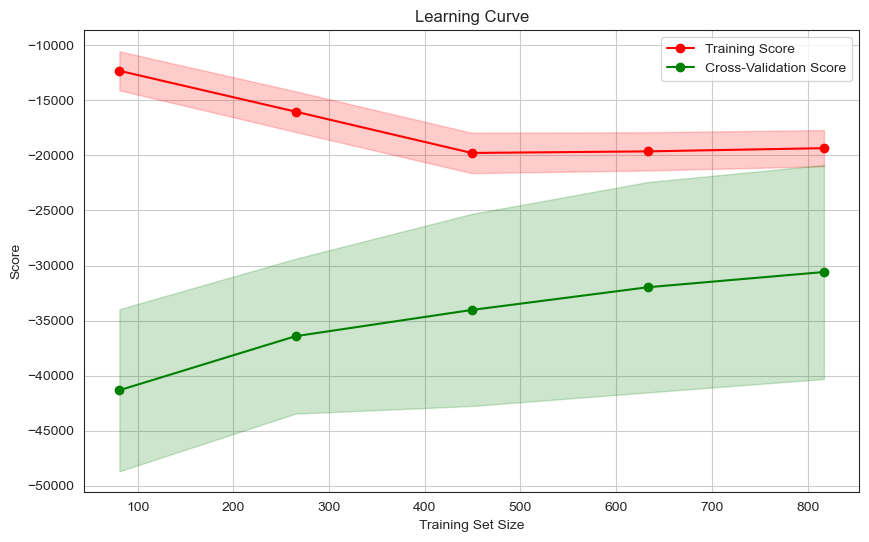

In [158]:
plot_learning_curve(pipe_simple_avg_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Weighted Average Model

## Blending Model

# Comparison Model

. Here's a brief explanation of each metric:

- Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted values and the true values. It provides a measure of the average magnitude of errors without considering their direction. Lower values indicate better performance.

- Mean Squared Error (MSE): MSE calculates the average squared difference between the predicted values and the true values. It amplifies larger errors due to the squaring operation. Like MAE, lower values indicate better performance.

- Root Mean Squared Error (RMSE): RMSE is the square root of MSE and represents the average magnitude of the prediction errors in the same units as the target variable. It is commonly used as a more interpretable measure of the model's prediction error. Again, lower values indicate better performance.

- R2 (R-squared): R2 measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher values of R2 indicate better performance, with values close to 1 indicating that the model explains a large portion of the variance.

- R2_train: This is R2 calculated on the training data. It represents how well the model fits the training data and can be used to assess the model's training performance. It is important to also evaluate the model's performance on separate validation or test data to assess its generalization capability.

- RMSLE (Root Mean Squared Logarithmic Error): RMSLE is similar to RMSE, but it calculates the root mean squared logarithmic difference between the predicted and true values. It is commonly used when the target variable has a skewed distribution or when relative errors are more important than absolute errors.

- MAPE (Mean Absolute Percentage Error): MAPE measures the average percentage difference between the predicted and true values. It is commonly used when the relative errors are more important than absolute errors. Lower values of MAPE indicate better performance.

These metrics help assess different aspects of a regression model's performance, such as the average magnitude of errors, the proportion of explained variance, and the relative accuracy of predictions. The choice of which metrics to use depends on the specific problem, the nature of the target variable, and the evaluation criteria that are most relevant to your application.

In [141]:
models = pd.DataFrame(evaluation_metrics_models)
columns_to_convert = ['MAE', 'MSE', 'RMSE', 'R2_train', 'R2', 'RMSLE', 'MAPE']
models[columns_to_convert] = models[columns_to_convert].astype(float)
models.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

model           MAE           MSE          RMSE  R2_train  \
0          xgb_tf  1.571143e+04  5.737771e+08  2.395364e+04  0.917775   
1          xgb_ts  1.622233e+04  6.253890e+08  2.500778e+04  0.910378   
2           gb_ts  1.599151e+04  6.473697e+08  2.544346e+04  0.907228   
3          svr_tf  1.566858e+04  6.633306e+08  2.575520e+04  0.904941   
4           gb_tf  1.530966e+04  6.673381e+08  2.583289e+04  0.904367   
5         lgbm_tf  1.558130e+04  6.823677e+08  2.612217e+04  0.902213   
6         lgbm_ts  1.558755e+04  6.875809e+08  2.622176e+04  0.901466   
7          svr_ts  1.631178e+04  7.576416e+08  2.752529e+04  0.891426   
8     lgbm_ts_pca  1.823451e+04  8.448998e+08  2.906716e+04  0.878921   
9      xgb_ts_pca  1.807825e+04  8.574463e+08  2.928218e+04  0.877123   
10     svr_ts_pca  1.815660e+04  8.950135e+08  2.991678e+04  0.871740   
11      gb_ts_pca  1.862520e+04  9.150601e+08  3.024996e+04  0.868867   
12       lasso_ts  1.987531e+04  1.026378e+09  3.203714e+04  0.852914   
13       lasso_tf  1.993819e+04  1.028609e+09  3.207194e+04  0.852595   
14         krr_tf  1.989859e+04  1.070337e+09  3.271600e+04  0.846615   
15        enet_tf  1.992962e+04  1.078915e+09  3.284684e+04  0.845385   
16        enet_ts  1.975902e+04  1.081600e+09  3.288768e+04  0.845001   
17         krr_ts  1.977208e+04  1.085314e+09  3.294410e+04  0.844468   
18     krr_ts_pca  2.121618e+04  1.141598e+09  3.378754e+04  0.836403   
19    enet_ts_pca  2.121354e+04  1.144565e+09  3.383143e+04  0.835977   
20   lasso_ts_pca  2.138738e+04  1.173639e+09  3.425842e+04  0.831811   
21         knn_tf  2.077936e+04  1.188242e+09  3.447088e+04  0.829718   
22         knn_ts  2.105115e+04  1.198866e+09  3.462465e+04  0.828196   
23  linreg_ts_pca  2.368272e+04  1.333820e+09  3.652150e+04  0.873422   
24     knn_ts_pca  2.258737e+04  1.441180e+09  3.796288e+04  0.793471   
25      linreg_tf  1.781490e+13  3.583178e+28  1.892928e+14  0.884491   
26      linreg_ts  3.432772e+13  1.150501e+29  3.391904e+14  0.884492   

              R2     RMSLE          MAPE  \
0   9.177750e-01  0.130747  9.351975e+00   
1   9.103780e-01  0.130336  9.432585e+00   
2   9.072280e-01  0.135293  9.489630e+00   
3   9.049410e-01  0.131606  9.269302e+00   
4   9.043670e-01  0.130287  8.985953e+00   
5   9.022130e-01  0.130338  9.193905e+00   
6   9.014660e-01  0.130925  9.204430e+00   
7   8.914260e-01  0.135400  9.530825e+00   
8   8.789210e-01  0.147302  1.077818e+01   
9   8.771230e-01  0.147524  1.066586e+01   
10  8.717400e-01  0.145340  1.050627e+01   
11  8.688670e-01  0.151587  1.093236e+01   
12  8.529140e-01  0.163413  1.193632e+01   
13  8.525950e-01  0.163757  1.197625e+01   
14  8.466150e-01  0.168343  1.169705e+01   
15  8.453850e-01  0.166889  1.172319e+01   
16  8.450010e-01  0.166492  1.160884e+01   
17  8.444680e-01  0.168198  1.159851e+01   
18  8.364030e-01  0.181028  1.281220e+01   
19  8.359770e-01  0.180772  1.283068e+01   
20  8.318110e-01  0.180436  1.297922e+01   
21  8.297180e-01  0.168519  1.177747e+01   
22  8.281960e-01  0.171711  1.206645e+01   
23  8.088560e-01  0.205593  1.441002e+01   
24  7.934710e-01  0.174976  1.279806e+01   
25 -5.134896e+18  2.197800  1.459359e+10   
26 -1.648733e+19  2.413460  2.382864e+10   

                                         best_params_  
0   {'xgb__subsample': 1, 'xgb__reg_lambda': 0.1, ...  
1   {'xgb__subsample': 1, 'xgb__reg_lambda': 0, 'x...  
2   {'gb__subsample': 0.5, 'gb__n_estimators': 500...  
3   {'svr__C': 1000, 'svr__gamma': 0.01, 'svr__ker...  
4   {'gb__subsample': 0.5, 'gb__n_estimators': 500...  
5   {'lgbm__subsample': 0.7, 'lgbm__n_estimators':...  
6   {'lgbm__subsample': 1.0, 'lgbm__n_estimators':...  
7   {'svr__C': 1, 'svr__gamma': 0.1, 'svr__kernel'...  
8   {'lgbm__subsample': 0.5, 'lgbm__n_estimators':...  
9   {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0, ...  
10  {'svr__C': 0.001, 'svr__gamma': 1, 'svr__kerne...  
11  {'gb__subsample': 0.7, 'gb__n_estimators': 500...  
12    

In [142]:
evaluation_metrics_models

[{'model': 'linreg_tf',
  'MAE': '17814897557104.097656',
  'MSE': '35831782853879716246303277056.000000',
  'RMSE': '189292849452586.875000',
  'R2_train': '0.884491',
  'R2': '-5134895586306436096.000000',
  'RMSLE': '2.197800',
  'MAPE': '14593591328.477842'},
 {'model': 'linreg_ts',
  'MAE': '34327721122903.835938',
  'MSE': '115050122527910134049910292480.000000',
  'RMSE': '339190392741171.437500',
  'R2_train': '0.884492',
  'R2': '-16487328268920176640.000000',
  'RMSLE': '2.413460',
  'MAPE': '23828635908.687668'},
 {'model': 'linreg_ts_pca',
  'MAE': '23682.719562',
  'MSE': '1333819869.872929',
  'RMSE': '36521.498735',
  'R2_train': '0.873422',
  'R2': '0.808856',
  'RMSLE': '0.205593',
  'MAPE': '14.410020'},
 {'model': 'lasso_tf',
  'best_params_': {'lasso__alpha': 100},
  'MAE': '19938.190519',
  'MSE': '1028609032.653526',
  'RMSE': '32071.935281',
  'R2_train': '0.852595',
  'R2': '0.852595',
  'RMSLE': '0.163757',
  'MAPE': '11.976247'},
 {'model': 'lasso_ts',
  'best

In [ ]:
models.info()

In [ ]:
evaluation_metrics_models

In [ ]:
np.expm1(0.2)

In [ ]:
np.log1p(24170.630541)